In [54]:
import pandas as pd

# Define the file path
file_path = r"C:\Users\clint\Desktop\Lifecycle Code\data\csv_data\graph2table\combined_data.csv"

# Read the CSV file
data = pd.read_csv(file_path)

data

,Date,4YO,5YO,3-5YO Avg.,Source_File,3YO,2YO
0,2015-01-01,78000,70000,83000.0,02_2018.csv,NaN,NaN
1,2015-01-01,78000,69000,80000.0,05_2018.csv,NaN,NaN
2,2015-01-01,78000,70000,80000.0,07_2018.csv,NaN,NaN
3,2015-01-01,76000,68000,80000.0,04_2018.csv,NaN,NaN
4,2015-01-01,77000,69000,78000.0,08_2018.csv,NaN,NaN
...,...,...,...,...,...,...,...
2135,2024-07-01,65000,50000,NaN,01_2025.csv,96000.0,NaN
2136,2024-07-01,71000,50000,NaN,8_2024.csv,92000.0,NaN
2137,2024-07-01,68000,52000,NaN,9_2024.csv,100000.0,NaN
2138,2024-09-01,62000,45000,NaN,01_2025.csv,94000.0,NaN


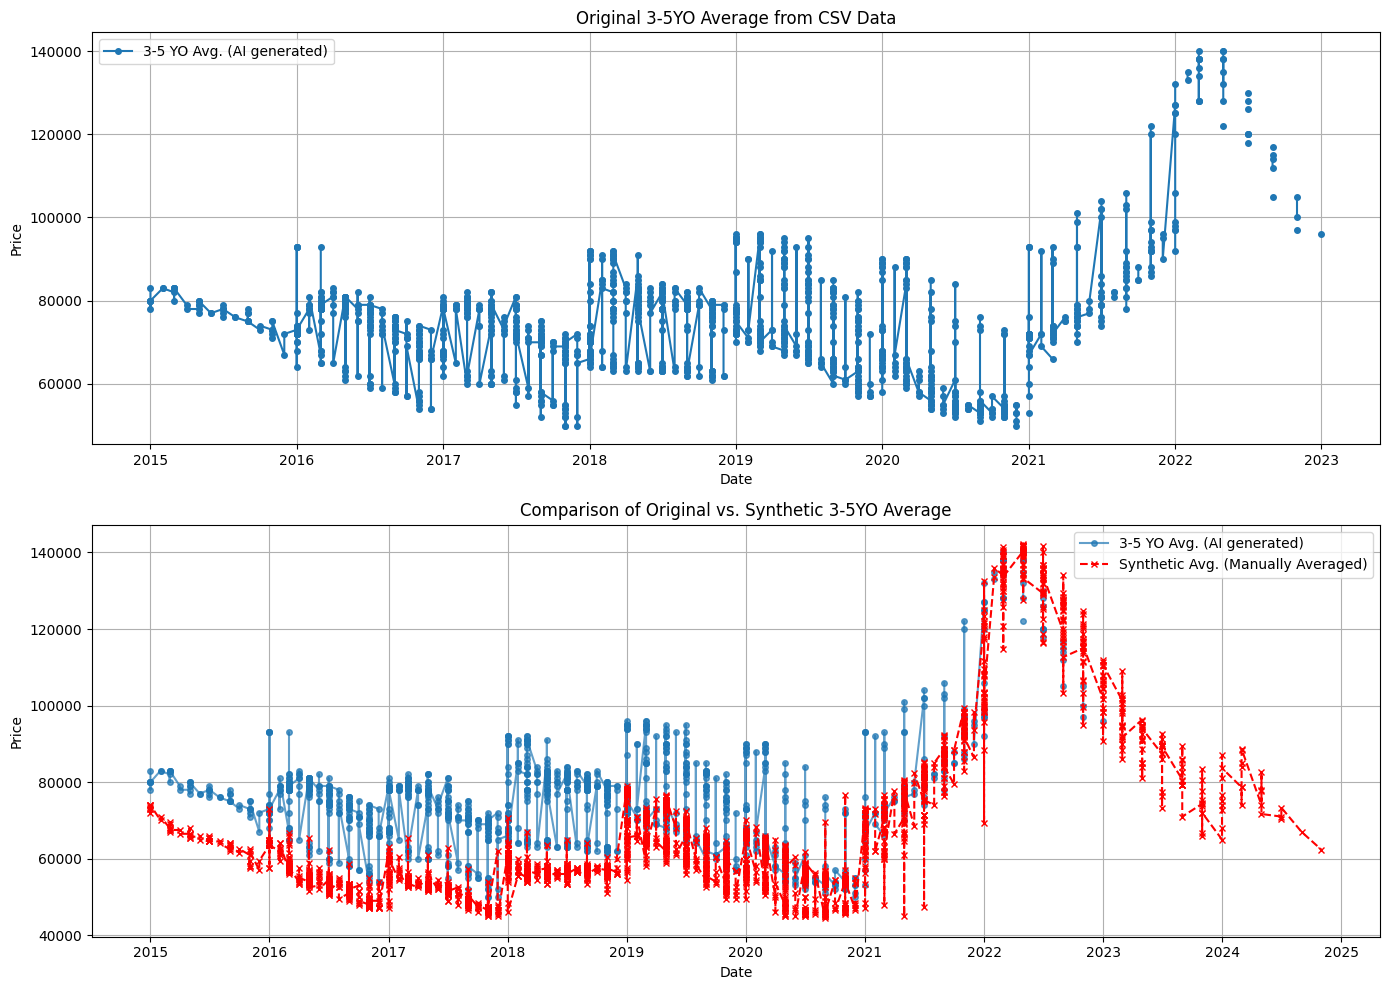

Number of rows where both original and synthetic averages are available: 1546
Mean difference between original and synthetic averages: 14181.00
Correlation between original and synthetic averages: 0.7117


In [55]:
import matplotlib.pyplot as plt
import numpy as np

# Convert Date column to datetime format
data['Date'] = pd.to_datetime(data['Date'])

# Create synthetic 3-5YO average by averaging the 3YO, 4YO, and 5YO columns row by row
# First, calculate the synthetic average where all three columns have values
data['Synthetic Avg'] = data[['3YO', '4YO', '5YO']].mean(axis=1, skipna=False)  # skipna=False to get NaN if any value is missing

# For rows where only 4YO and 5YO are available, calculate average of those two
mask = data['3YO'].isna() & data['4YO'].notna() & data['5YO'].notna()
data.loc[mask, 'Synthetic Avg'] = data.loc[mask, ['4YO', '5YO']].mean(axis=1)

# Sort data by date
data_sorted = data.sort_values('Date')

# Create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(14, 10))

# Plot 1: Original 3-5YO Avg. column
ax1.plot(data_sorted['Date'], data_sorted['3-5YO Avg.'], label='3-5 YO Avg. (AI generated)', marker='o', linestyle='-', markersize=4)
ax1.set_title('Original 3-5YO Average from CSV Data')
ax1.set_xlabel('Date')
ax1.set_ylabel('Price')
ax1.grid(True)
ax1.legend()

# Plot 2: Compare the original average with our synthetic average
ax2.plot(data_sorted['Date'], data_sorted['3-5YO Avg.'], label='3-5 YO Avg. (AI generated)', marker='o', linestyle='-', markersize=4, alpha=0.7)
ax2.plot(data_sorted['Date'], data_sorted['Synthetic Avg'], label='Synthetic Avg. (Manually Averaged)', marker='x', linestyle='--', markersize=4, color='red')
ax2.set_title('Comparison of Original vs. Synthetic 3-5YO Average')
ax2.set_xlabel('Date')
ax2.set_ylabel('Price')
ax2.grid(True)
ax2.legend()

plt.tight_layout()
plt.show()

# Compare where both values are available
valid_comparison = data.dropna(subset=['3-5YO Avg.', 'Synthetic Avg'])
print(f"Number of rows where both original and synthetic averages are available: {len(valid_comparison)}")
if len(valid_comparison) > 0:
    mean_diff = np.mean(valid_comparison['3-5YO Avg.'] - valid_comparison['Synthetic Avg'])
    print(f"Mean difference between original and synthetic averages: {mean_diff:.2f}")
    
    # Calculate correlation
    correlation = valid_comparison['3-5YO Avg.'].corr(valid_comparison['Synthetic Avg'])
    print(f"Correlation between original and synthetic averages: {correlation:.4f}")

In [56]:
# Let's examine the rows where there are discrepancies between the original and synthetic averages
valid_comparison = data.dropna(subset=['3-5YO Avg.', 'Synthetic Avg']).copy()
valid_comparison['Difference'] = valid_comparison['3-5YO Avg.'] - valid_comparison['Synthetic Avg']

# Find rows with large differences
threshold = 5000  # Define what constitutes a significant difference
large_diff_rows = valid_comparison[abs(valid_comparison['Difference']) > threshold]

if len(large_diff_rows) > 0:
    print(f"Found {len(large_diff_rows)} rows with differences larger than {threshold}:")
    display(large_diff_rows[['Date', '3YO', '4YO', '5YO', '3-5YO Avg.', 'Synthetic Avg', 'Difference', 'Source_File']].sort_values(by='Difference', ascending=False))
else:
    print("No significant discrepancies found between original and synthetic averages.")
    
# Show some statistical summary of the differences
print("\nStatistics of differences:")
display(valid_comparison['Difference'].describe())

Found 1211 rows with differences larger than 5000:


,Date,3YO,4YO,5YO,3-5YO Avg.,Synthetic Avg,Difference,Source_File
1496,2020-07-01,NaN,51000,40000,84000.0,45500.000000,38500.000000,09_2020.csv
1376,2020-03-01,NaN,64000,41000,90000.0,52500.000000,37500.000000,09_2020.csv
589,2018-01-01,NaN,69000,40000,92000.0,54500.000000,37500.000000,08_2020.csv
1348,2020-03-01,NaN,63000,42000,90000.0,52500.000000,37500.000000,11_2020.csv
1353,2020-03-01,NaN,62000,42000,89000.0,52000.000000,37000.000000,05_2020.csv
...,...,...,...,...,...,...,...,...
1780,2021-07-01,105000.0,77000,60000,74000.0,80666.666667,-6666.666667,02_2023.csv
1829,2021-11-01,120000.0,88000,72000,86000.0,93333.333333,-7333.333333,02_2023.csv
1910,2022-03-01,154000.0,140000,112000,128000.0,135333.333333,-7333.333333,12_2022.csv
1816,2021-09-01,110000.0,82000,65000,78000.0,85666.666667,-7666.666667,02_2023.csv



Statistics of differences:


count     1546.000000
mean     14181.004743
std      10654.471148
min      -8333.333333
25%       6000.000000
50%      13500.000000
75%      23000.000000
max      38500.000000
Name: Difference, dtype: float64

In [57]:
# Let's check how the 3-5YO Avg. is calculated in the original data
# First, let's sample some rows where all values are present
sample_rows = data.dropna(subset=['3YO', '4YO', '5YO', '3-5YO Avg.']).sample(min(10, len(data.dropna(subset=['3YO', '4YO', '5YO', '3-5YO Avg.']))))

# Add a column with our calculated average
sample_rows['Manual Avg'] = (sample_rows['3YO'] + sample_rows['4YO'] + sample_rows['5YO']) / 3
sample_rows['3+4+5/3 = Orig?'] = np.isclose(sample_rows['Manual Avg'], sample_rows['3-5YO Avg.'], rtol=0.01)

# Display the results
print("Sample rows to check how 3-5YO Avg. might be calculated:")
display(sample_rows[['Date', '3YO', '4YO', '5YO', '3-5YO Avg.', 'Manual Avg', '3+4+5/3 = Orig?', 'Source_File']])

# Check if there might be different weights
def weighted_avg(row, weights):
    return (row['3YO'] * weights[0] + row['4YO'] * weights[1] + row['5YO'] * weights[2]) / sum(weights)

# Try different weight combinations
weight_options = [
    (1, 1, 1),  # Equal weights
    (2, 1, 1),  # More weight on 3YO
    (1, 2, 1),  # More weight on 4YO
    (1, 1, 2)   # More weight on 5YO
]

for weights in weight_options:
    sample_rows[f'Weighted Avg {weights}'] = sample_rows.apply(lambda row: weighted_avg(row, weights), axis=1)
    sample_rows[f'{weights} = Orig?'] = np.isclose(sample_rows[f'Weighted Avg {weights}'], sample_rows['3-5YO Avg.'], rtol=0.01)
    
# Display the results with different weight calculations
print("\nTesting different weighting schemes:")
columns_to_display = ['Date', '3YO', '4YO', '5YO', '3-5YO Avg.']
for weights in weight_options:
    columns_to_display.extend([f'Weighted Avg {weights}', f'{weights} = Orig?'])
display(sample_rows[columns_to_display])

Sample rows to check how 3-5YO Avg. might be calculated:


,Date,3YO,4YO,5YO,3-5YO Avg.,Manual Avg,3+4+5/3 = Orig?,Source_File
1007,2019-04-01,94000.0,73000,60000,73000.0,75666.666667,False,03_2022.csv
1044,2019-05-01,95000.0,73000,56000,72000.0,74666.666667,False,09_2022.csv
1330,2020-02-01,88000.0,66000,46000,65000.0,66666.666667,False,04_2022.csv
1526,2020-09-01,77000.0,53000,38000,55000.0,56000.000000,False,08_2022.csv
1696,2021-03-01,86000.0,71000,53000,73000.0,70000.000000,False,11_2022.csv
1142,2019-08-01,82000.0,65000,46000,65000.0,64333.333333,False,04_2022.csv
1802,2021-09-01,105000.0,87000,72000,89000.0,88000.000000,False,11_2022.csv
1037,2019-05-01,94000.0,74000,60000,74000.0,76000.000000,False,10_2022.csv
1858,2021-11-01,120000.0,95000,77000,99000.0,97333.333333,False,01_2023.csv
1780,2021-07-01,105000.0,77000,60000,74000.0,80666.666667,False,02_2023.csv



Testing different weighting schemes:


,Date,3YO,4YO,5YO,3-5YO Avg.,"Weighted Avg (1, 1, 1)","(1, 1, 1) = Orig?","Weighted Avg (2, 1, 1)","(2, 1, 1) = Orig?","Weighted Avg (1, 2, 1)","(1, 2, 1) = Orig?","Weighted Avg (1, 1, 2)","(1, 1, 2) = Orig?"
1007,2019-04-01,94000.0,73000,60000,73000.0,75666.666667,False,80250.0,False,75000.0,False,71750.0,False
1044,2019-05-01,95000.0,73000,56000,72000.0,74666.666667,False,79750.0,False,74250.0,False,70000.0,False
1330,2020-02-01,88000.0,66000,46000,65000.0,66666.666667,False,72000.0,False,66500.0,False,61500.0,False
1526,2020-09-01,77000.0,53000,38000,55000.0,56000.000000,False,61250.0,False,55250.0,True,51500.0,False
1696,2021-03-01,86000.0,71000,53000,73000.0,70000.000000,False,74000.0,False,70250.0,False,65750.0,False
1142,2019-08-01,82000.0,65000,46000,65000.0,64333.333333,False,68750.0,False,64500.0,True,59750.0,False
1802,2021-09-01,105000.0,87000,72000,89000.0,88000.000000,False,92250.0,False,87750.0,False,84000.0,False
1037,2019-05-01,94000.0,74000,60000,74000.0,76000.000000,False,80500.0,False,75500.0,False,72000.0,False
1858,2021-11-01,120000.0,95000,77000,99000.0,97333.333333,False,103000.0,False,96750.0,False,92250.0,False
1780,2021-07-01,105000.0,77000,60000,74000.0,80666.666667,False,86750.0,False,79750.0,False,75500.0,False


Date range in dataset: 2015-01-01 00:00:00 to 2024-11-01 00:00:00
Number of unique dates: 103

Count of NaN values in key columns:
3YO           1265
4YO              0
5YO              0
3-5YO Avg.     594
dtype: int64

Data points per Year-Quarter:


,Year,Quarter,count
0,2015,1,16
1,2015,2,11
2,2015,3,16
3,2015,4,11
4,2016,1,76
5,2016,2,50
6,2016,3,76
7,2016,4,50
8,2017,1,76
9,2017,2,50


C:\Users\clint\AppData\Local\Temp\ipykernel_21848\1307936204.py:48: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  complete_triplets = data.groupby(['Year', 'Quarter']).apply(


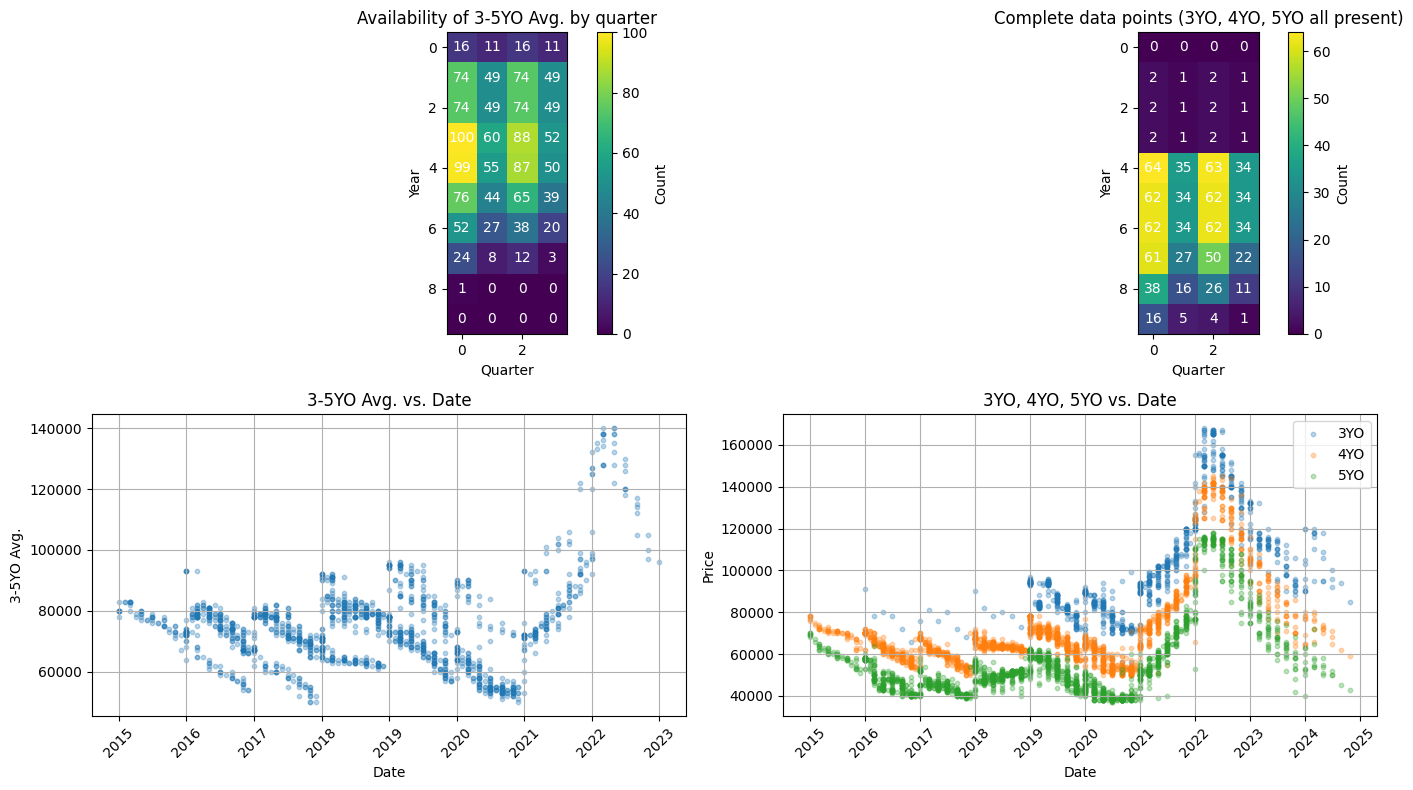


Valid data points per Year-Quarter for each column:


,Year,Quarter,3YO,4YO,5YO,3-5YO Avg.,Synthetic Avg
0,2015,1,0,16,16,16,16
1,2015,2,0,11,11,11,11
2,2015,3,0,16,16,16,16
3,2015,4,0,11,11,11,11
4,2016,1,2,76,76,74,76
5,2016,2,1,50,50,49,50
6,2016,3,2,76,76,74,76
7,2016,4,1,50,50,49,50
8,2017,1,2,76,76,74,76
9,2017,2,1,50,50,49,50



Quarters with biggest discrepancy between Original and Synthetic Avg counts:


,Year,Quarter,3YO,4YO,5YO,3-5YO Avg.,Synthetic Avg,Missing
0,2015,1,0,16,16,16,16,0
1,2015,2,0,11,11,11,11,0
2,2015,3,0,16,16,16,16,0
3,2015,4,0,11,11,11,11,0
5,2016,2,1,50,50,49,50,-1
7,2016,4,1,50,50,49,50,-1
11,2017,4,1,50,50,49,50,-1
9,2017,2,1,50,50,49,50,-1
39,2024,4,1,1,1,0,1,-1
13,2018,2,1,61,61,60,61,-1


In [58]:
# Diagnostic cell to check quarterly grouping and identify missing values
import pandas as pd
import matplotlib.pyplot as plt

# Convert Date column to datetime format if not already done
if not pd.api.types.is_datetime64_any_dtype(data['Date']):
    data['Date'] = pd.to_datetime(data['Date'])

# Print unique dates in the dataset to verify we have the correct time range
print(f"Date range in dataset: {data['Date'].min()} to {data['Date'].max()}")
print(f"Number of unique dates: {data['Date'].nunique()}")

# Check for NaN values in key columns
print("\nCount of NaN values in key columns:")
print(data[['3YO', '4YO', '5YO', '3-5YO Avg.']].isna().sum())

# Count data points by year and quarter
data['Year'] = data['Date'].dt.year
data['Quarter'] = data['Date'].dt.quarter
data['YearQuarter'] = data['Year'].astype(str) + '-Q' + data['Quarter'].astype(str)

# Count records by year-quarter
yq_counts = data.groupby(['Year', 'Quarter']).size().reset_index(name='count')
print("\nData points per Year-Quarter:")
display(yq_counts)

# Check how many year-quarter combinations have valid values for our columns of interest
cols_of_interest = ['3YO', '4YO', '5YO', '3-5YO Avg.']
valid_data_counts = data.groupby(['Year', 'Quarter'])[cols_of_interest].count().reset_index()

# Create heatmap of data availability
plt.figure(figsize=(14, 8))

# Plot availability of '3-5YO Avg.' column
heatmap_data = valid_data_counts.pivot(index='Year', columns='Quarter', values='3-5YO Avg.')
plt.subplot(2, 2, 1)
plt.title('Availability of 3-5YO Avg. by quarter')
plt.imshow(heatmap_data, cmap='viridis')
plt.colorbar(label='Count')
plt.xlabel('Quarter')
plt.ylabel('Year')
for i in range(heatmap_data.shape[0]):
    for j in range(heatmap_data.shape[1]):
        if not pd.isna(heatmap_data.iloc[i, j]):
            plt.text(j, i, int(heatmap_data.iloc[i, j]), ha='center', va='center', color='white')

# Plot availability of synthetic average (all 3YO, 4YO, 5YO available)
complete_triplets = data.groupby(['Year', 'Quarter']).apply(
    lambda x: (~x[['3YO', '4YO', '5YO']].isna()).all(axis=1).sum()
).reset_index(name='complete_triplets')
heatmap_complete = complete_triplets.pivot(index='Year', columns='Quarter', values='complete_triplets')
plt.subplot(2, 2, 2)
plt.title('Complete data points (3YO, 4YO, 5YO all present)')
plt.imshow(heatmap_complete, cmap='viridis')
plt.colorbar(label='Count')
plt.xlabel('Quarter')
plt.ylabel('Year')
for i in range(heatmap_complete.shape[0]):
    for j in range(heatmap_complete.shape[1]):
        if not pd.isna(heatmap_complete.iloc[i, j]):
            plt.text(j, i, int(heatmap_complete.iloc[i, j]), ha='center', va='center', color='white')

# Create scatterplot of the data to see if there are patterns or clusters
plt.subplot(2, 2, 3)
plt.title('3-5YO Avg. vs. Date')
plt.scatter(data['Date'], data['3-5YO Avg.'], alpha=0.3, s=10)
plt.xlabel('Date')
plt.ylabel('3-5YO Avg.')
plt.grid(True)
plt.xticks(rotation=45)

# Examine specific year-quarters where we might be missing data
plt.subplot(2, 2, 4)
plt.title('3YO, 4YO, 5YO vs. Date')
plt.scatter(data['Date'], data['3YO'], label='3YO', alpha=0.3, s=10)
plt.scatter(data['Date'], data['4YO'], label='4YO', alpha=0.3, s=10)
plt.scatter(data['Date'], data['5YO'], label='5YO', alpha=0.3, s=10)
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

# Create a table showing the number of valid data points for each column by year-quarter
valid_counts = data.groupby(['Year', 'Quarter'])[
    ['3YO', '4YO', '5YO', '3-5YO Avg.', 'Synthetic Avg']
].count().reset_index()

print("\nValid data points per Year-Quarter for each column:")
display(valid_counts.sort_values(['Year', 'Quarter']))

# Look at quarters with most missing data
valid_counts['Missing'] = valid_counts['3-5YO Avg.'] - valid_counts['Synthetic Avg']
print("\nQuarters with biggest discrepancy between Original and Synthetic Avg counts:")
display(valid_counts.sort_values('Missing', ascending=False).head(10))

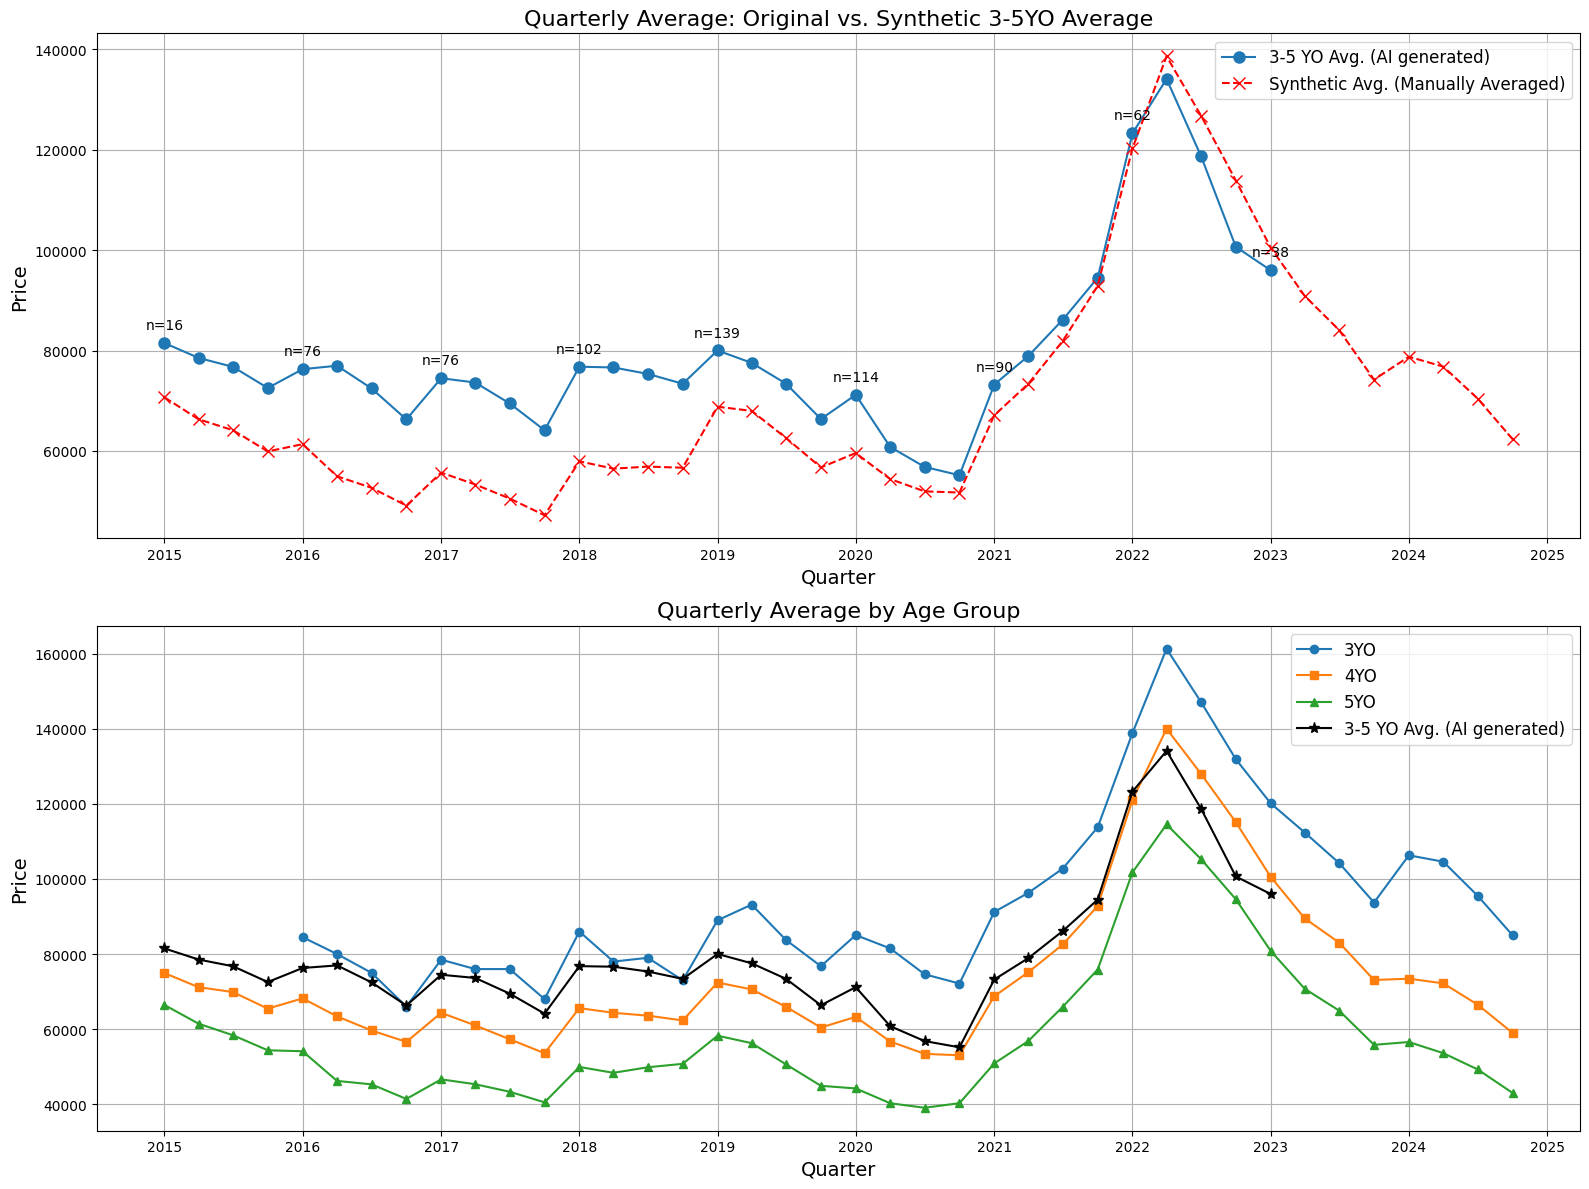

Quarterly Average Difference (Original - Synthetic):


,Quarter,3YO,4YO,5YO,3-5YO Avg.,Synthetic Avg,Difference,count
0,2015Q1,NaN,74937.500000,66437.500000,81500.000000,70687.500000,10812.500000,16
1,2015Q2,NaN,71181.818182,61454.545455,78545.454545,66318.181818,12227.272727,11
2,2015Q3,NaN,69875.000000,58375.000000,76750.000000,64125.000000,12625.000000,16
3,2015Q4,NaN,65454.545455,54363.636364,72545.454545,59909.090909,12636.363636,11
4,2016Q1,84500.000000,68197.368421,54105.263158,76290.540541,61344.298246,14946.242295,76
5,2016Q2,80000.000000,63400.000000,46200.000000,76979.591837,54946.666667,22032.925170,50
6,2016Q3,75000.000000,59644.736842,45289.473684,72459.459459,52657.894737,19801.564723,76
7,2016Q4,66000.000000,56600.000000,41400.000000,66285.714286,49110.000000,17175.714286,50
8,2017Q1,78500.000000,64342.105263,46618.421053,74486.486486,55682.017544,18804.468943,76
9,2017Q2,76000.000000,61000.000000,45320.000000,73632.653061,53310.000000,20322.653061,50



Statistics of quarterly differences:


count       33.000000
mean      9975.181827
std       8855.391097
min     -13212.121212
25%       4870.400797
50%      11208.451421
75%      17175.714286
max      22032.925170
Name: Difference, dtype: float64


Correlation between time (quarter) and difference: nan


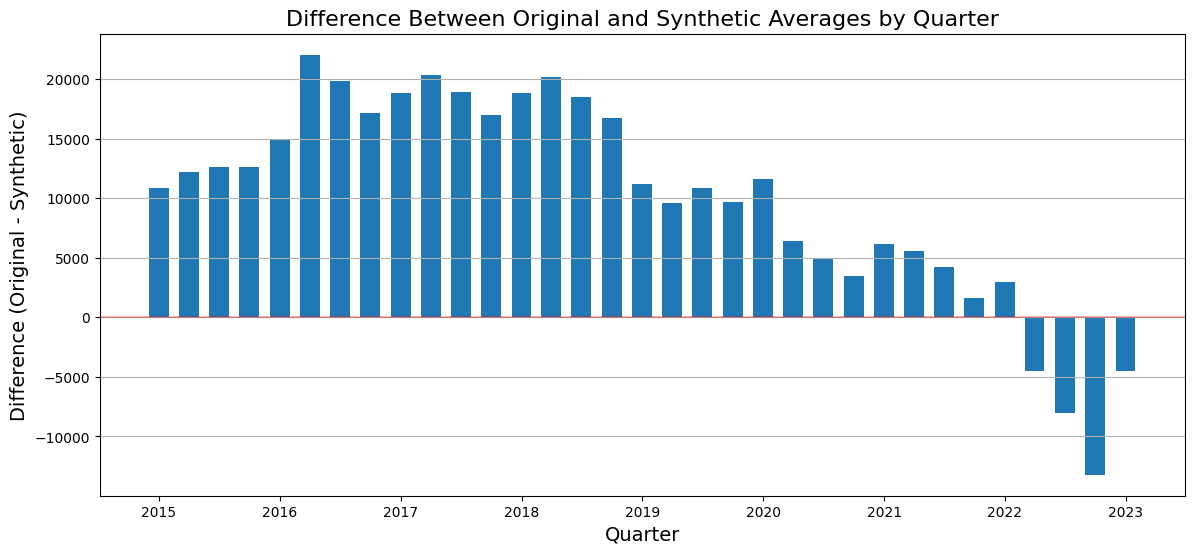

In [59]:
# Group data by quarter and plot
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Add quarter column to the data
data['Quarter'] = data['Date'].dt.to_period('Q')

# Group by quarter and calculate mean for each column of interest
quarterly_data = data.groupby('Quarter').agg({
    '3YO': 'mean',
    '4YO': 'mean',
    '5YO': 'mean',
    '3-5YO Avg.': 'mean',
    'Synthetic Avg': 'mean'
}).reset_index()

# Convert Period to datetime for plotting
quarterly_data['Date'] = quarterly_data['Quarter'].dt.to_timestamp()

# Calculate how many data points were averaged per quarter
count_per_quarter = data.groupby('Quarter').size().reset_index(name='count')
quarterly_data = pd.merge(quarterly_data, count_per_quarter, on='Quarter')

# Create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(16, 12))

# Plot 1: Original vs Synthetic 3-5YO Avg.
ax1.plot(quarterly_data['Date'], quarterly_data['3-5YO Avg.'], 
         label='3-5 YO Avg. (AI generated)', marker='o', linestyle='-', markersize=8)
ax1.plot(quarterly_data['Date'], quarterly_data['Synthetic Avg'], 
         label='Synthetic Avg. (Manually Averaged)', marker='x', linestyle='--', markersize=8, color='red')
ax1.set_title('Quarterly Average: Original vs. Synthetic 3-5YO Average', fontsize=16)
ax1.set_xlabel('Quarter', fontsize=14)
ax1.set_ylabel('Price', fontsize=14)
ax1.grid(True)
ax1.legend(fontsize=12)

# Annotate with count of data points per quarter (every 4th quarter for readability)
for i, row in quarterly_data.iloc[::4].iterrows():
    ax1.annotate(f"n={row['count']}", 
                 (row['Date'], row['3-5YO Avg.']), 
                 textcoords="offset points",
                 xytext=(0,10), 
                 ha='center')

# Plot 2: All age groups
ax2.plot(quarterly_data['Date'], quarterly_data['3YO'], 
         label='3YO', marker='o', linestyle='-', markersize=6)
ax2.plot(quarterly_data['Date'], quarterly_data['4YO'], 
         label='4YO', marker='s', linestyle='-', markersize=6)
ax2.plot(quarterly_data['Date'], quarterly_data['5YO'], 
         label='5YO', marker='^', linestyle='-', markersize=6)
ax2.plot(quarterly_data['Date'], quarterly_data['3-5YO Avg.'], 
         label='3-5 YO Avg. (AI generated)', marker='*', linestyle='-', markersize=8, color='black')
ax2.set_title('Quarterly Average by Age Group', fontsize=16)
ax2.set_xlabel('Quarter', fontsize=14)
ax2.set_ylabel('Price', fontsize=14)
ax2.grid(True)
ax2.legend(fontsize=12)

plt.tight_layout()
plt.show()

# Calculate and display the average difference per quarter
quarterly_data['Difference'] = quarterly_data['3-5YO Avg.'] - quarterly_data['Synthetic Avg']
print('Quarterly Average Difference (Original - Synthetic):')
display(quarterly_data[['Quarter', '3YO', '4YO', '5YO', '3-5YO Avg.', 'Synthetic Avg', 'Difference', 'count']].sort_values('Quarter'))

# Calculate overall statistics of the quarterly differences
print('\nStatistics of quarterly differences:')
display(quarterly_data['Difference'].describe())

# Check for correlation between quarter and difference
quarterly_data['Quarter_num'] = quarterly_data['Date'].astype(int) // 10**9  # Convert to UNIX timestamp
diff_corr = np.corrcoef(quarterly_data['Quarter_num'], quarterly_data['Difference'])[0,1]
print(f"\nCorrelation between time (quarter) and difference: {diff_corr:.4f}")

# Plot the differences over time
plt.figure(figsize=(14, 6))
plt.bar(quarterly_data['Date'], quarterly_data['Difference'], width=60)
plt.axhline(y=0, color='r', linestyle='-', alpha=0.3)
plt.title('Difference Between Original and Synthetic Averages by Quarter', fontsize=16)
plt.xlabel('Quarter', fontsize=14)
plt.ylabel('Difference (Original - Synthetic)', fontsize=14)
plt.grid(True, axis='y')
plt.show()

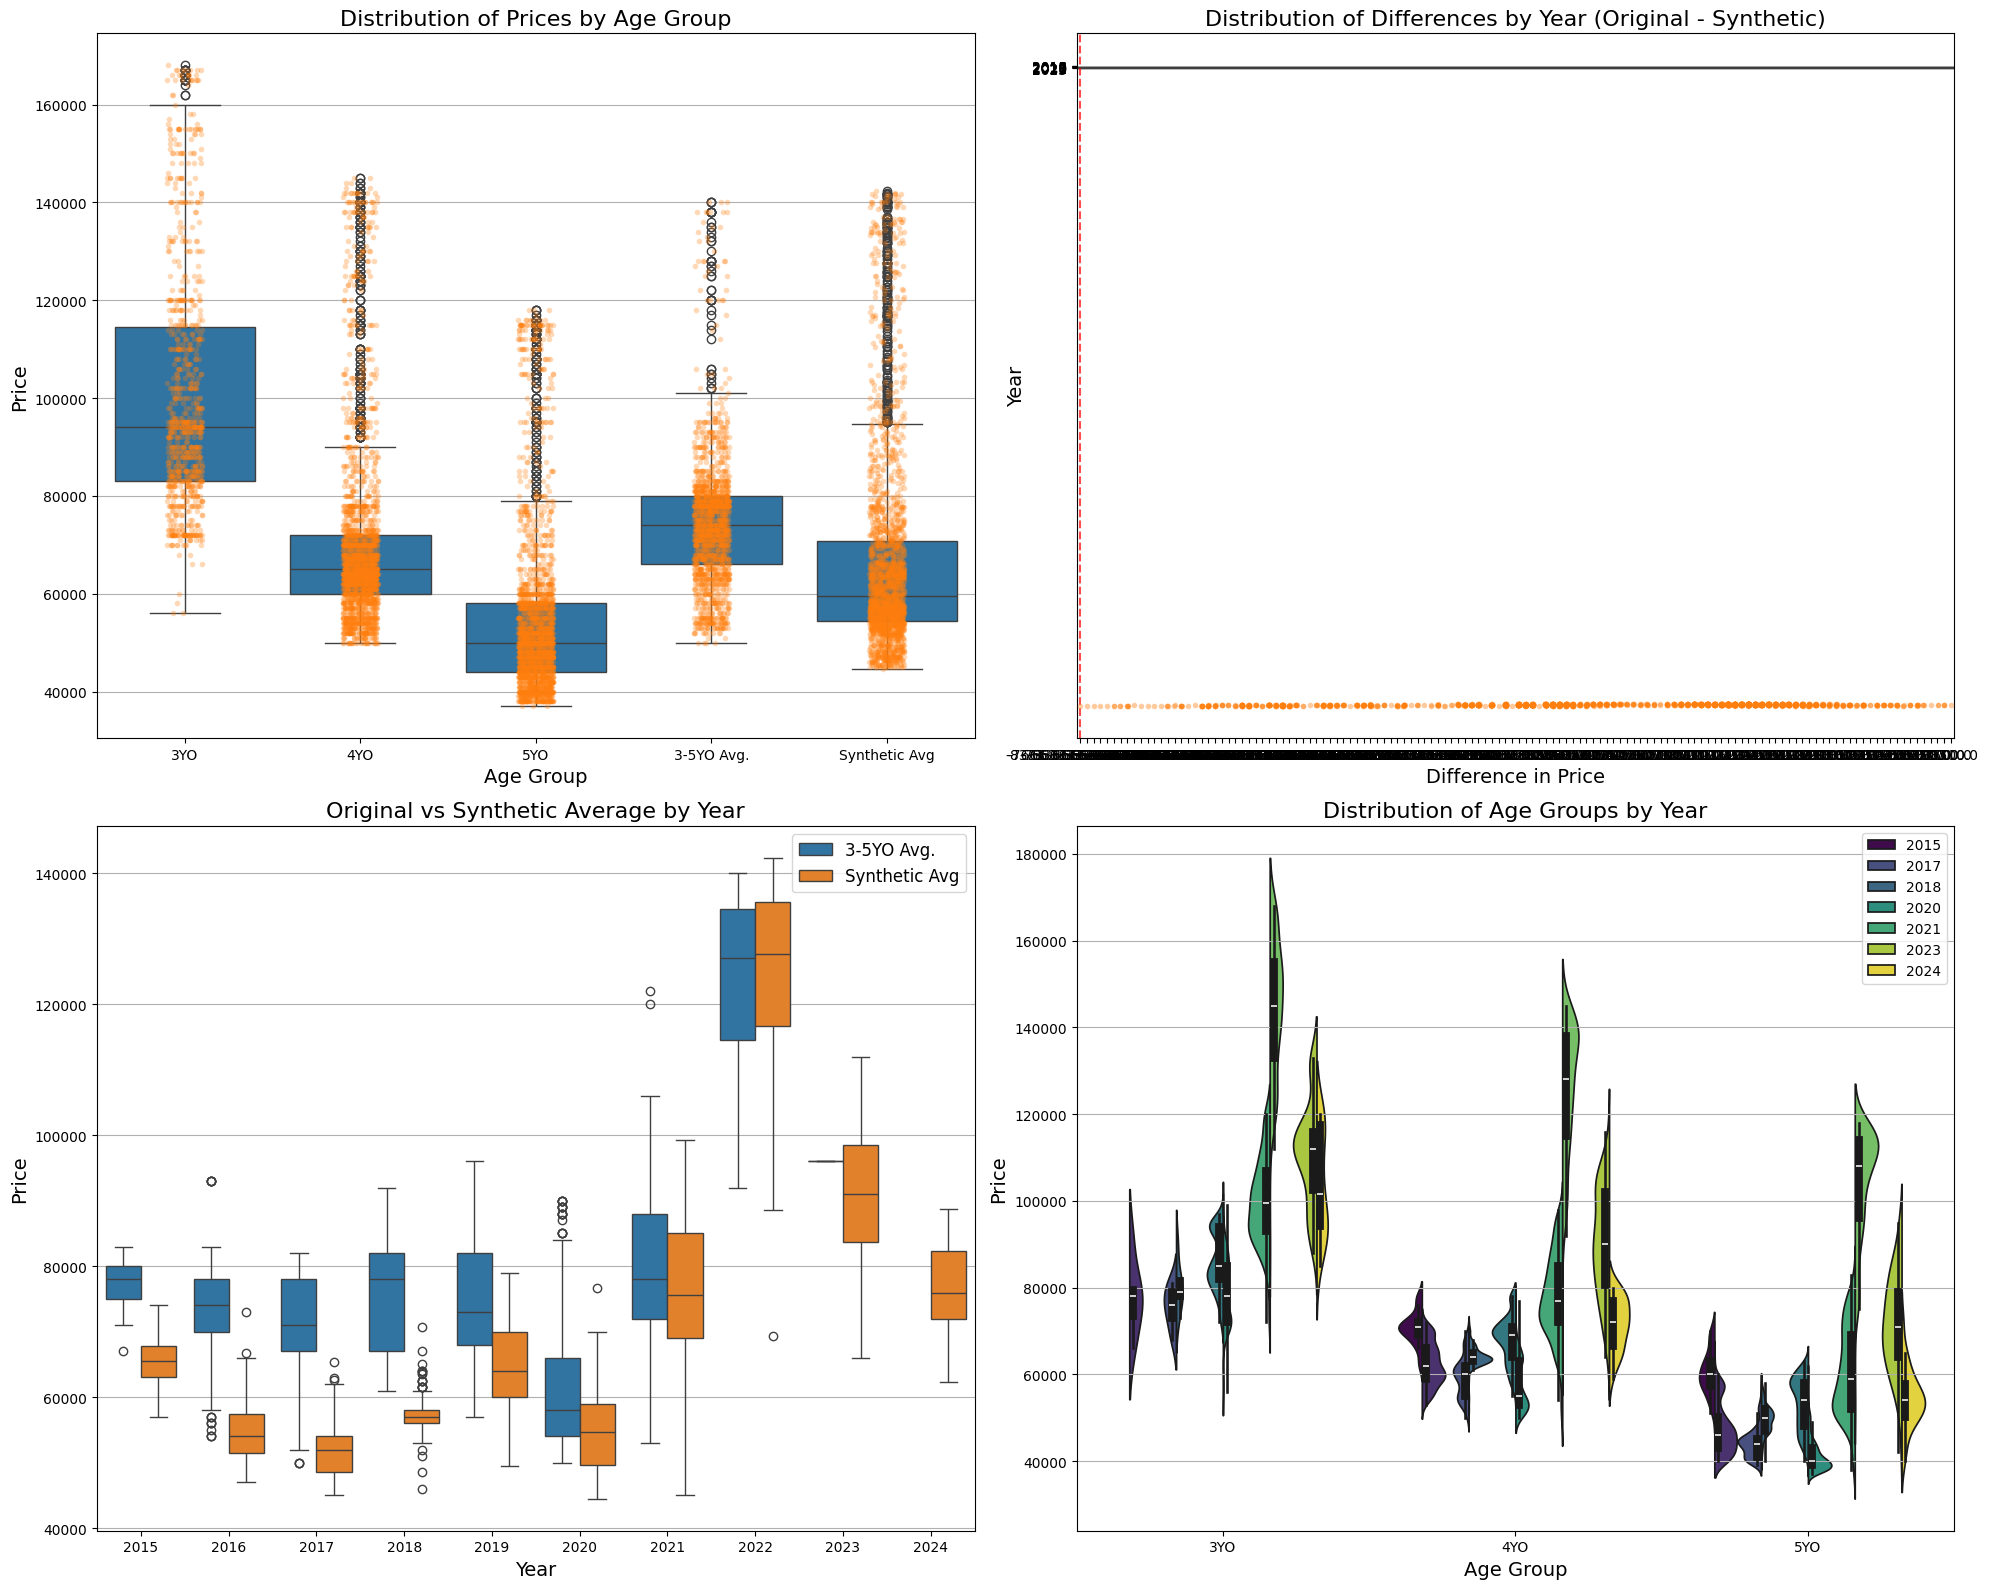

Statistics of differences by year:


,Year,mean,median,std,count
0,2015,12009.259259,12250.000000,2436.922628,54
1,2016,18461.382114,20500.000000,6777.930311,246
2,2017,18973.577236,21500.000000,6897.671376,246
3,2018,18793.333333,21500.000000,8976.220288,300
4,2019,12336.197022,7500.000000,11321.447935,291
5,2020,8924.107143,7000.000000,11230.283911,224
6,2021,6194.647202,666.666667,11666.694141,137
7,2022,-17.730496,-1000.000000,5833.254041,47
8,2023,-8333.333333,-8333.333333,NaN,1


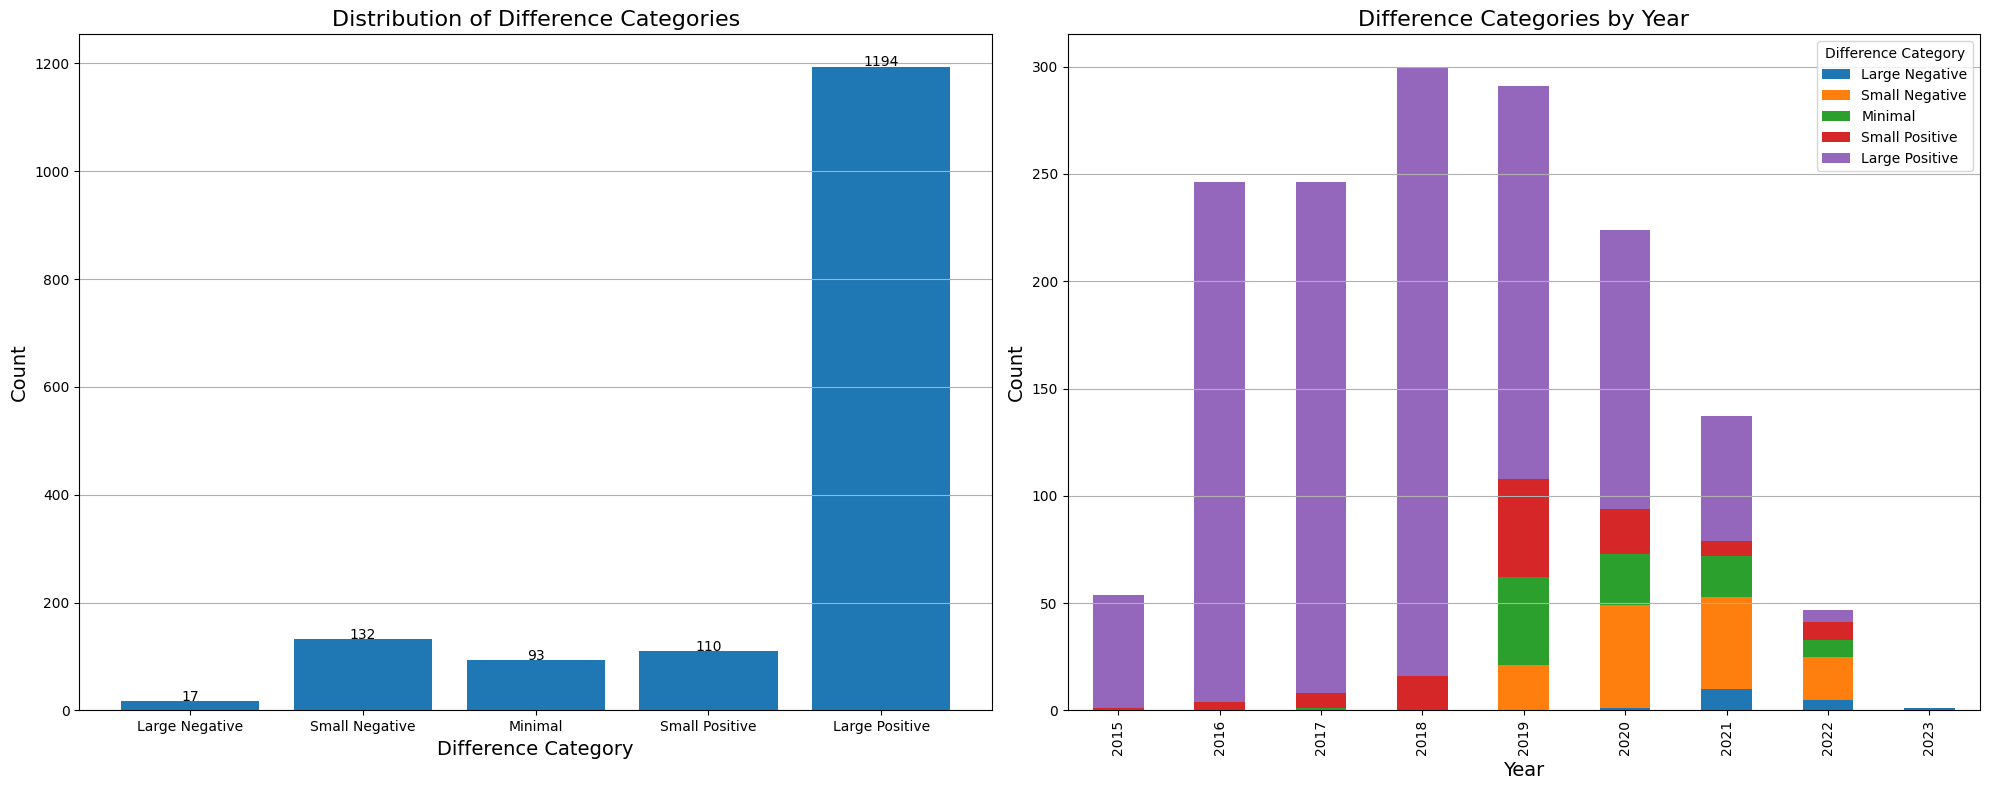

In [60]:
# Create boxplot visualizations instead of quarterly grouping
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Add Year as a categorical variable for grouping in boxplots
if 'Year' not in data.columns:
    data['Year'] = data['Date'].dt.year.astype(str)

# Set up a figure with multiple subplots
fig, axs = plt.subplots(2, 2, figsize=(20, 16))

# Plot 1: Boxplot comparing distributions of all columns of interest
# Melt the dataframe to create a long format suitable for seaborn
columns_to_plot = ['3YO', '4YO', '5YO', '3-5YO Avg.', 'Synthetic Avg']
melted_data = data.melt(
    id_vars=['Date', 'Year'], 
    value_vars=columns_to_plot,
    var_name='Age Group', 
    value_name='Price'
)

# Remove NaNs for the boxplot
melted_data = melted_data.dropna(subset=['Price'])

# Box plot of price distributions for different age groups
sns.boxplot(x='Age Group', y='Price', data=melted_data, ax=axs[0, 0])
axs[0, 0].set_title('Distribution of Prices by Age Group', fontsize=16)
axs[0, 0].set_xlabel('Age Group', fontsize=14)
axs[0, 0].set_ylabel('Price', fontsize=14)
axs[0, 0].grid(axis='y')

# Add data points as a swarm plot on top of the boxplot (jittered to reduce overlap)
sns.stripplot(x='Age Group', y='Price', data=melted_data, 
              size=4, alpha=0.3, jitter=True, ax=axs[0, 0])

# Plot 2: Boxplot showing distribution of differences between original and synthetic averages
valid_comparison = data.dropna(subset=['3-5YO Avg.', 'Synthetic Avg']).copy()
valid_comparison['Difference'] = valid_comparison['3-5YO Avg.'] - valid_comparison['Synthetic Avg']

# Add a new column for difference categories
bins = [-float('inf'), -5000, -1000, 1000, 5000, float('inf')]
labels = ['Large Negative', 'Small Negative', 'Minimal', 'Small Positive', 'Large Positive']
valid_comparison['Difference Category'] = pd.cut(valid_comparison['Difference'], bins=bins, labels=labels)

# Boxplot of differences
sns.boxplot(x='Difference', y='Year', data=valid_comparison, orient='h', ax=axs[0, 1])
axs[0, 1].set_title('Distribution of Differences by Year (Original - Synthetic)', fontsize=16)
axs[0, 1].set_xlabel('Difference in Price', fontsize=14)
axs[0, 1].set_ylabel('Year', fontsize=14)
axs[0, 1].grid(axis='x')
axs[0, 1].axvline(x=0, color='red', linestyle='--', alpha=0.7)

# Add data points to show the actual distribution
sns.stripplot(x='Difference', y='Year', data=valid_comparison, 
              size=4, alpha=0.4, jitter=True, ax=axs[0, 1])

# Plot 3: Side-by-side boxplots of Original vs Synthetic by Year
# Filter for just the two columns we want to compare
compare_data = data[['Year', '3-5YO Avg.', 'Synthetic Avg']].copy()
compare_melted = compare_data.melt(
    id_vars=['Year'],
    value_vars=['3-5YO Avg.', 'Synthetic Avg'],
    var_name='Average Type',
    value_name='Price'
)
compare_melted = compare_melted.dropna(subset=['Price'])

# Create a grouped boxplot
sns.boxplot(x='Year', y='Price', hue='Average Type', data=compare_melted, ax=axs[1, 0])
axs[1, 0].set_title('Original vs Synthetic Average by Year', fontsize=16)
axs[1, 0].set_xlabel('Year', fontsize=14)
axs[1, 0].set_ylabel('Price', fontsize=14)
axs[1, 0].grid(axis='y')
axs[1, 0].legend(fontsize=12)

# Plot 4: Violin plots showing the distribution of all age groups by year
age_data = data[['Year', '3YO', '4YO', '5YO']].copy()
age_melted = age_data.melt(
    id_vars=['Year'],
    value_vars=['3YO', '4YO', '5YO'],
    var_name='Age Group',
    value_name='Price'
)
age_melted = age_melted.dropna(subset=['Price'])

# Create violin plots with embedded boxplots
sns.violinplot(x='Age Group', y='Price', hue='Year', data=age_melted, 
               split=True, inner='box', ax=axs[1, 1], palette='viridis')
axs[1, 1].set_title('Distribution of Age Groups by Year', fontsize=16)
axs[1, 1].set_xlabel('Age Group', fontsize=14)
axs[1, 1].set_ylabel('Price', fontsize=14)
axs[1, 1].grid(axis='y')
axs[1, 1].legend(fontsize=10, title_fontsize=12)

plt.tight_layout()
plt.show()

# Create a figure for additional detailed analysis
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 8))

# Calculate statistics about the differences by year
diff_stats = valid_comparison.groupby('Year')['Difference'].agg(
    ['mean', 'median', 'std', 'count']
).reset_index()
print("Statistics of differences by year:")
display(diff_stats)

# Plot the distribution of differences by category
category_counts = valid_comparison['Difference Category'].value_counts().sort_index()
ax1.bar(category_counts.index, category_counts.values)
ax1.set_title('Distribution of Difference Categories', fontsize=16)
ax1.set_xlabel('Difference Category', fontsize=14)
ax1.set_ylabel('Count', fontsize=14)
ax1.grid(axis='y')

# Print counts above each bar
for i, v in enumerate(category_counts.values):
    ax1.text(i, v + 0.5, str(v), ha='center')
    
# Get counts by Difference Category and Year
category_year = pd.crosstab(valid_comparison['Year'], valid_comparison['Difference Category'])
category_year.plot(kind='bar', stacked=True, ax=ax2)
ax2.set_title('Difference Categories by Year', fontsize=16)
ax2.set_xlabel('Year', fontsize=14)
ax2.set_ylabel('Count', fontsize=14)
ax2.grid(axis='y')
ax2.legend(title='Difference Category')

plt.tight_layout()
plt.show()

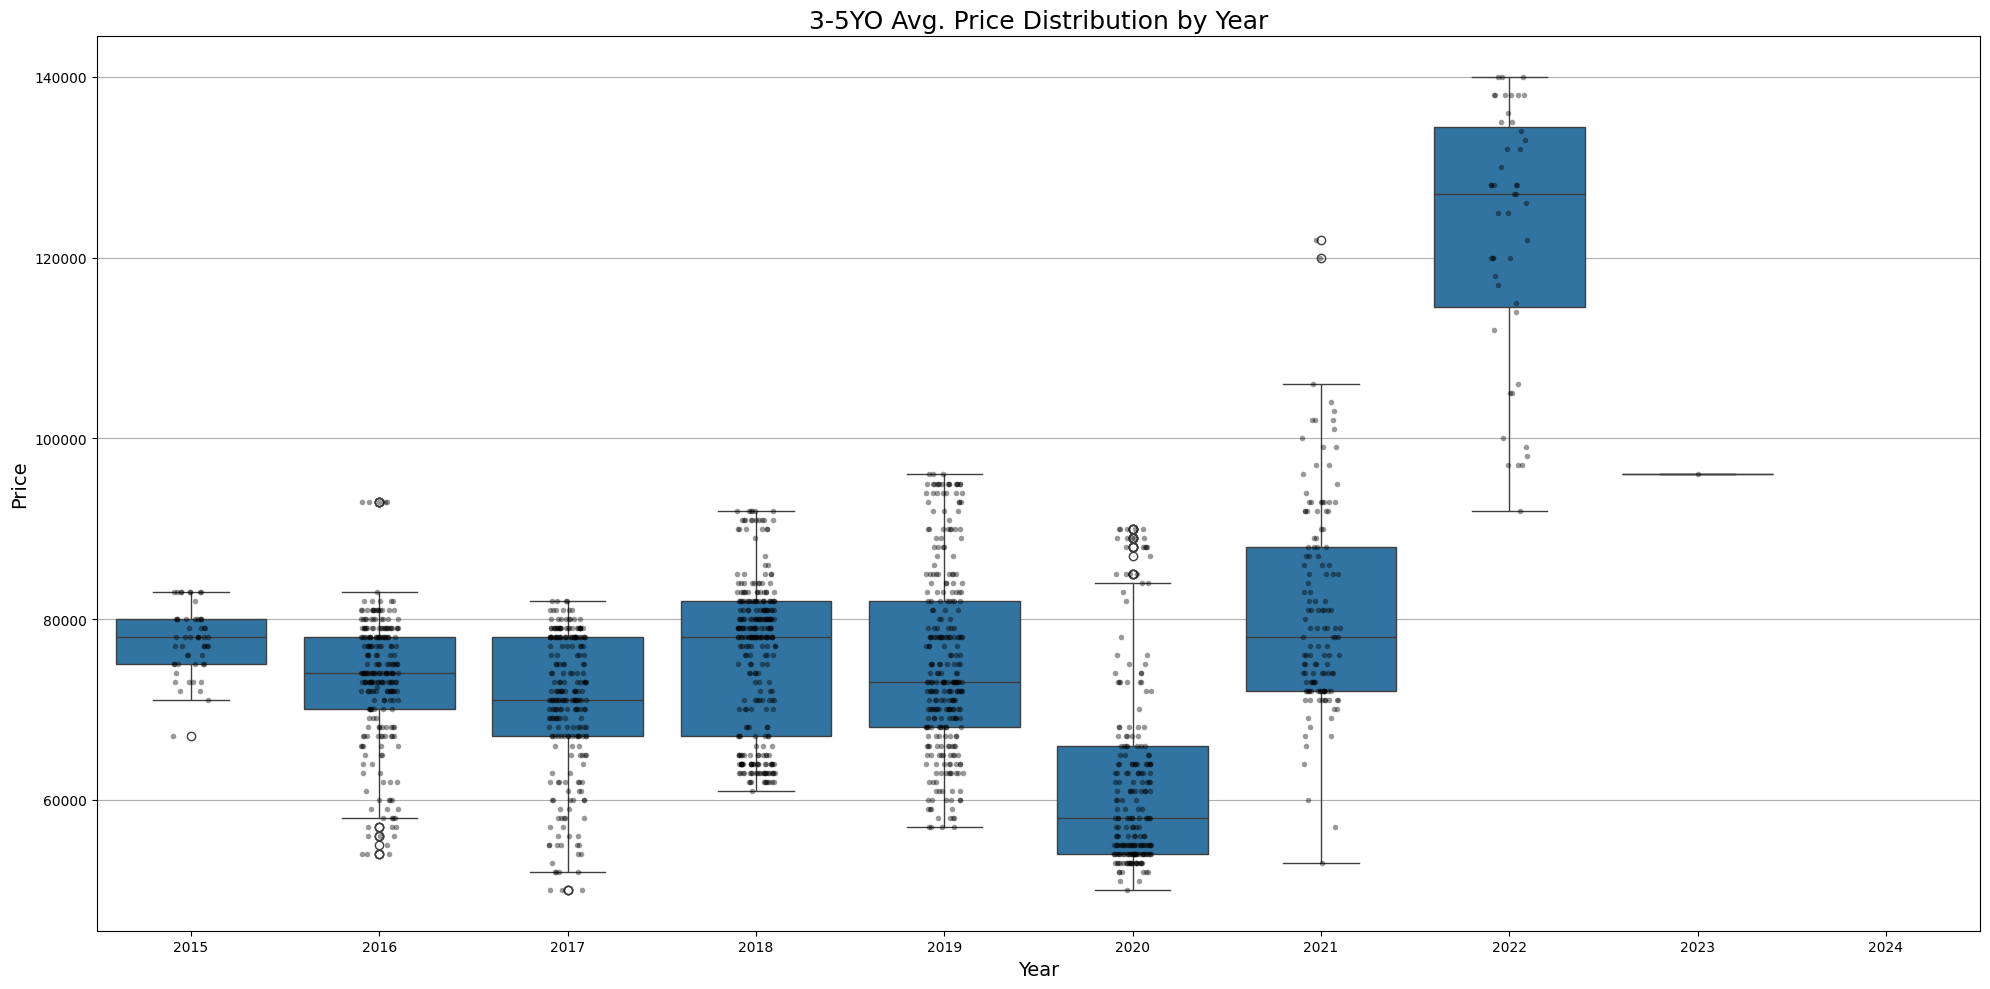

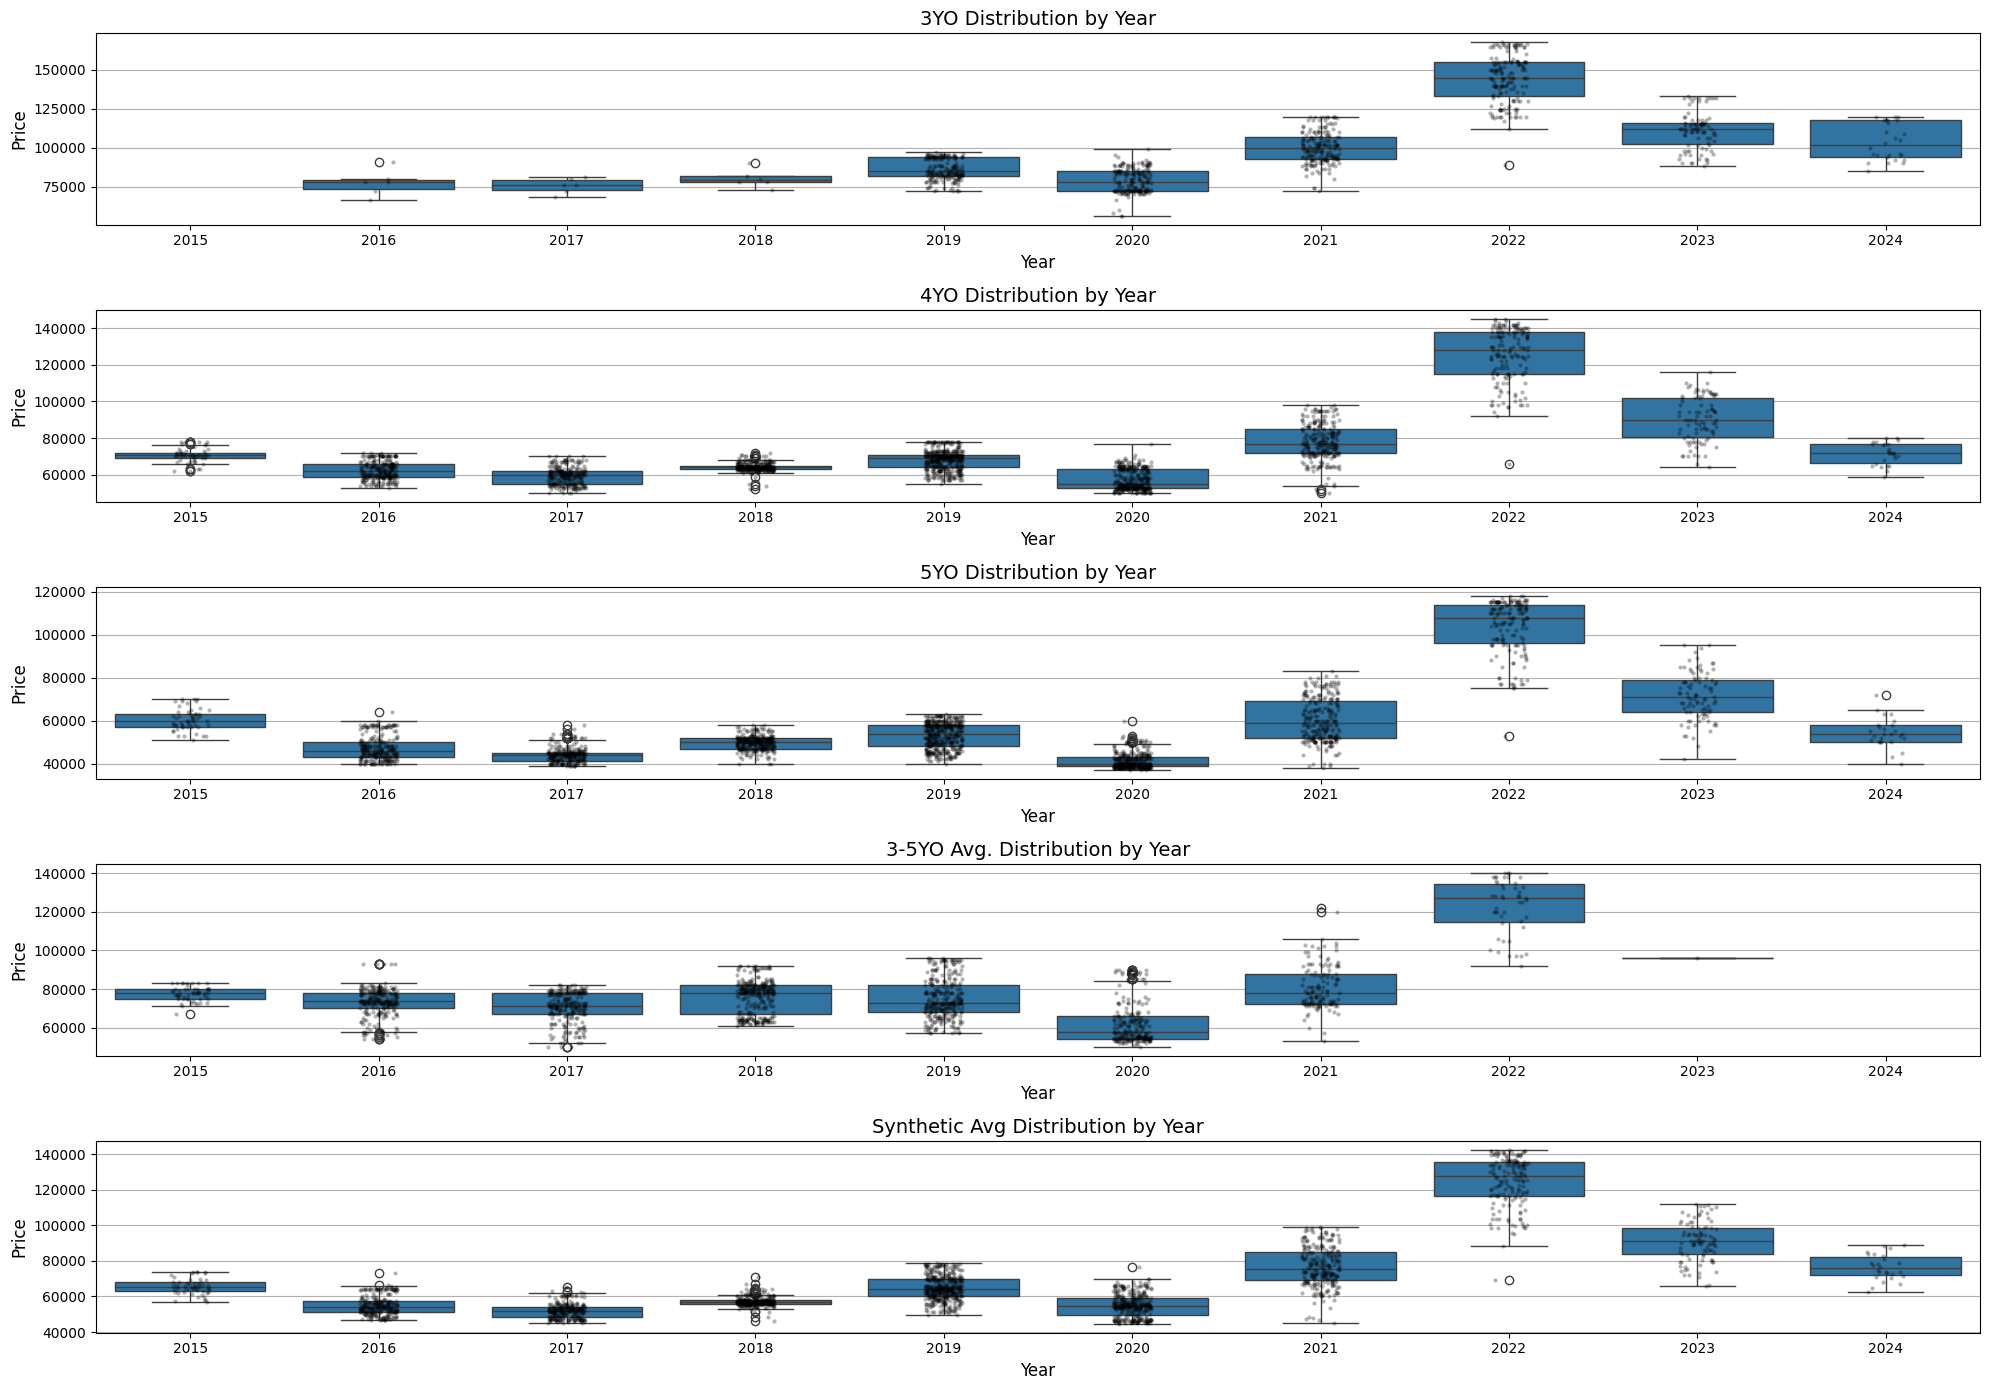

C:\Users\clint\AppData\Local\Temp\ipykernel_21848\78369294.py:68: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  g = sns.catplot(


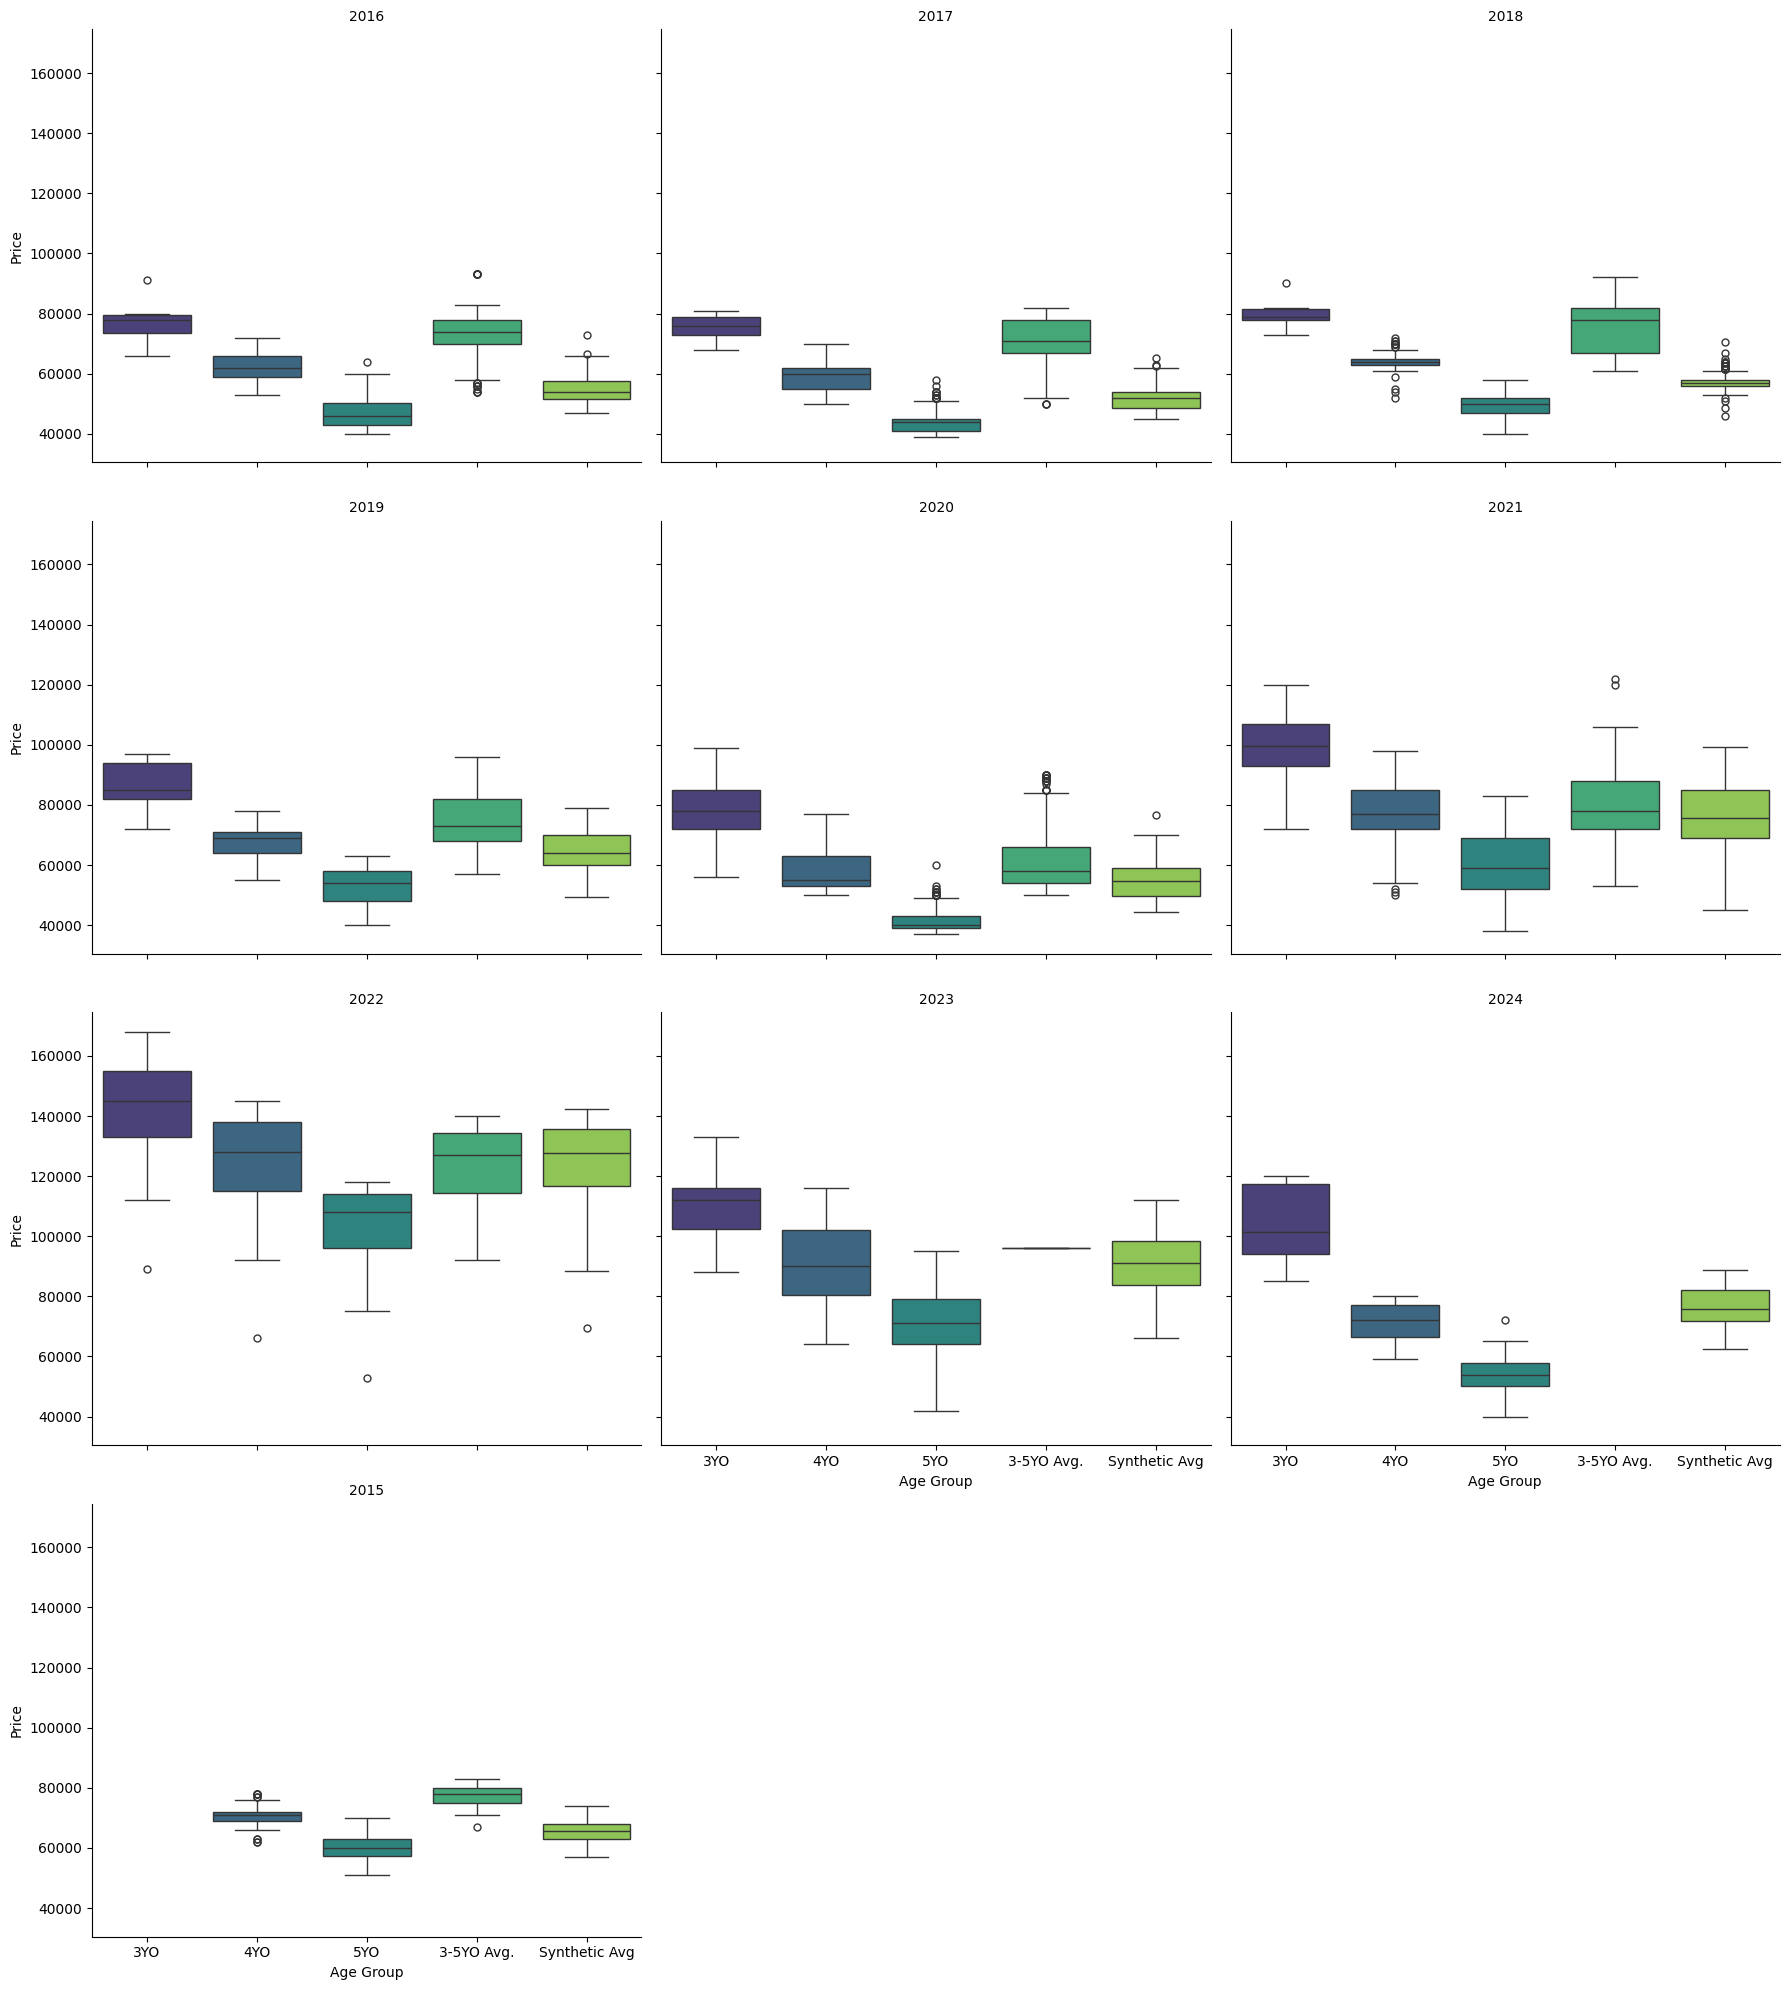

Statistical Summary by Year:


3YO                                                     4YO  \
           mean    median       std      min       max count       mean   
Year                                                                      
2015        NaN       NaN       NaN      NaN       NaN     0   70740.74   
2016   77500.00   78000.0   8384.51  66000.0   91000.0     6   62365.08   
2017   75500.00   76000.0   4888.76  68000.0   81000.0     6   59420.63   
2018   80166.67   79000.0   5671.57  73000.0   90000.0     6   64192.81   
2019   85928.57   85000.0   6690.60  72000.0   97000.0   196   68058.68   
2020   78770.83   78000.0   7747.97  56000.0   99000.0   192   57286.98   
2021   99854.17   99500.0   9951.17  72000.0  120000.0   192   77856.57   
2022  144293.75  145000.0  15301.00  89000.0  168000.0   160  125590.06   
2023  111043.96  112000.0  11777.49  88000.0  133000.0    91   90296.70   
2024  103500.00  101500.0  11799.15  85000.0  120000.0    26   71576.92   

                                 ... 3-5YO Avg.                           \
        median       std    min  ...        std      min       max count   
Year                             ...                                       
2015   71000.0   3847.00  62000  ...    3581.93  67000.0   83000.0    54   
2016   62000.0   4881.22  53000  ...    7233.32  54000.0   93000.0   246   
2017   60000.0   4742.54  50000  ...    7873.32  50000.0   82000.0   246   
2018   64000.0   2246.76  52000  ...    8511.50  61000.0   92000.0   300   
2019   69000.0   5326.73  55000  ...   10319.80  57000.0   96000.0   291   
2020   55000.0   5543.24  50000  ...   10633.62  50000.0   90000.0   224   
2021   77000.0   9749.43  50000  ...   11497.36  53000.0  122000.0   137   
2022  128000.0  14875.93  66000  ...   14210.91  92000.0  140000.0    47   
2023   90000.0  12141.29  64000  ...        NaN  96000.0   96000.0     1   
2024   72000.0   5954.31  59000  ...        NaN      NaN       NaN     0   

     Synthetic Avg                                                  
              mean     median       std       min        max count  
Year                                                                
2015      65657.41   65500.00   4311.92  57000.00   74000.00    54  
2016      55027.78   54000.00   5209.33  47000.00   73000.00   252  
2017      51967.59   52000.00   4029.52  45000.00   65333.33   252  
2018      57110.02   57000.00   2388.93  46000.00   70666.67   306  
2019      64698.04   64000.00   6857.30  49500.00   79000.00   409  
2020      54935.90   54666.67   6406.64  44500.00   76666.67   338  
2021      76758.30   75666.67  11069.55  45000.00   99333.33   251  
2022     124522.77  127666.67  13870.51  69333.33  142333.33   161  
2023      90945.05   91000.00  11146.09  66000.00  112000.00    91  
2024      76474.36   75833.33   7161.73  62333.33   88666.67    26  

[10 rows x 30 columns]

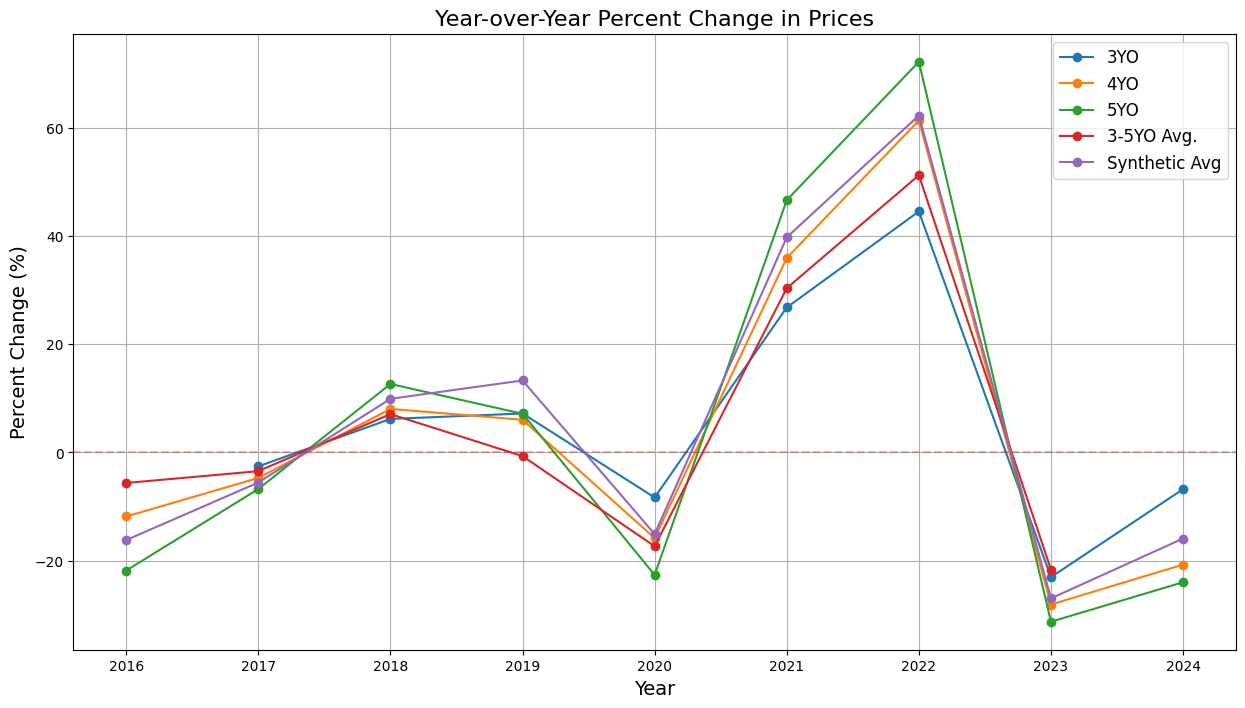


Yearly Averages with Percent Changes:


,Year,3YO,4YO,5YO,3-5YO Avg.,Synthetic Avg,3YO_pct_change,4YO_pct_change,5YO_pct_change,3-5YO Avg._pct_change,Synthetic Avg_pct_change
0,2015,NaN,70740.740741,60574.074074,77666.666667,65657.407407,NaN,NaN,NaN,NaN,NaN
1,2016,77500.000000,62365.079365,47357.142857,73282.520325,55027.777778,NaN,-11.839940,-21.819452,-5.644824,-16.189536
2,2017,75500.000000,59420.634921,44150.793651,70739.837398,51967.592593,-2.580645,-4.721303,-6.770571,-3.469699,-5.561164
3,2018,80166.666667,64192.810458,49732.026144,75743.333333,57110.021786,6.181015,8.031176,12.641296,7.073095,9.895454
4,2019,85928.571429,68058.679707,53278.728606,75223.367698,64698.044010,7.187407,6.022278,7.131627,-0.686484,13.286674
5,2020,78770.833333,57286.982249,41221.893491,62183.035714,54935.897436,-8.329870,-15.827074,-22.629735,-17.335480,-15.088782
6,2021,99854.166667,77856.573705,60426.294821,81043.795620,76758.300133,26.765406,35.906223,46.587868,30.331038,39.723393
7,2022,144293.750000,125590.062112,104031.055901,122531.914894,124522.774327,44.504486,61.309516,72.161898,51.192221,62.227113
8,2023,111043.956044,90296.703297,71494.505495,96000.000000,90945.054945,-23.043128,-28.102031,-31.275805,-21.653065,-26.965123
9,2024,103500.000000,71576.923077,54346.153846,NaN,76474.358974,-6.793667,-20.731410,-23.985552,NaN,-15.911471


In [61]:
# Create year-based box plot time charts
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Ensure we have Year as a string column for better display
if 'Year' not in data.columns:
    data['Year'] = data['Date'].dt.year
data['Year'] = data['Year'].astype(str)

# Set up a larger figure to show time evolution clearly
plt.figure(figsize=(20, 10))

# Create a time chart with boxplots for each year
# Using the year as x-axis to show the time evolution
sns.boxplot(x='Year', y='3-5YO Avg.', data=data.sort_values('Year'))

# Add individual data points to show the actual distribution
sns.stripplot(x='Year', y='3-5YO Avg.', data=data.sort_values('Year'), 
              size=4, alpha=0.4, jitter=True, color='black')

plt.title('3-5YO Avg. Price Distribution by Year', fontsize=18)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Price', fontsize=14)
plt.grid(axis='y')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

# Create a more detailed visualization with multiple age groups
plt.figure(figsize=(20, 14))

# Define columns of interest
cols_of_interest = ['3YO', '4YO', '5YO', '3-5YO Avg.', 'Synthetic Avg']

# Create a subplot for each column
for i, col in enumerate(cols_of_interest):
    plt.subplot(len(cols_of_interest), 1, i+1)
    
    # Create the boxplot
    sns.boxplot(x='Year', y=col, data=data.sort_values('Year'))
    
    # Add individual data points
    sns.stripplot(x='Year', y=col, data=data.sort_values('Year'), 
                  size=3, alpha=0.3, jitter=True, color='black')
    
    plt.title(f'{col} Distribution by Year', fontsize=14)
    plt.xlabel('Year', fontsize=12)
    plt.ylabel('Price', fontsize=12)
    plt.grid(axis='y')
    plt.xticks(rotation=0)

plt.tight_layout()
plt.show()

# Now create a single plot with facets for each year to compare all age groups
# Prepare data in long format
melted_data = data.melt(
    id_vars=['Date', 'Year'],
    value_vars=cols_of_interest,
    var_name='Age Group',
    value_name='Price'
)
melted_data = melted_data.dropna(subset=['Price'])

# Create FacetGrid for comparing age groups across years
g = sns.catplot(
    data=melted_data,
    kind="box",
    x="Age Group",
    y="Price",
    col="Year",
    col_wrap=3,  # Show 3 years per row
    height=5,
    aspect=1.2,
    sharex=True,
    sharey=True,
    palette="viridis"
)

# Customize the facet grid
g.set_axis_labels("Age Group", "Price")
g.set_titles("{col_name}")
g.tight_layout()
plt.show()

# Create a statistical summary table by year
yearly_summary = data.groupby('Year')[cols_of_interest].agg(
    ['mean', 'median', 'std', 'min', 'max', 'count']
).round(2)

print("Statistical Summary by Year:")
display(yearly_summary)

# Calculate year-over-year changes
yearly_means = data.groupby('Year')[cols_of_interest].mean().reset_index()
yearly_means['Year'] = yearly_means['Year'].astype(int)  # Make sure Year is numeric for sorting
yearly_means = yearly_means.sort_values('Year')

# Calculate percent changes
pct_changes = {}
for col in cols_of_interest:
    pct_changes[col] = []
    for i in range(1, len(yearly_means)):
        prev_value = yearly_means[col].iloc[i-1]
        curr_value = yearly_means[col].iloc[i]
        if prev_value > 0:  # Avoid division by zero
            pct_change = ((curr_value - prev_value) / prev_value) * 100
        else:
            pct_change = np.nan
        pct_changes[col].append(pct_change)
    # Add NaN for the first year as there's no previous year
    pct_changes[col] = [np.nan] + pct_changes[col]

# Add percent changes to yearly means
for col in cols_of_interest:
    yearly_means[f'{col}_pct_change'] = pct_changes[col]

# Plot year-over-year percent changes
plt.figure(figsize=(15, 8))
for col in cols_of_interest:
    plt.plot(yearly_means['Year'], yearly_means[f'{col}_pct_change'], 
             marker='o', linestyle='-', label=col)

plt.title('Year-over-Year Percent Change in Prices', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Percent Change (%)', fontsize=14)
plt.grid(True)
plt.legend(fontsize=12)
plt.axhline(y=0, color='r', linestyle='--', alpha=0.3)
plt.show()

# Print the yearly means with percent changes
print("\nYearly Averages with Percent Changes:")
yearly_display = yearly_means.copy()
yearly_display['Year'] = yearly_display['Year'].astype(str)  # Convert back to string for display
display(yearly_display)

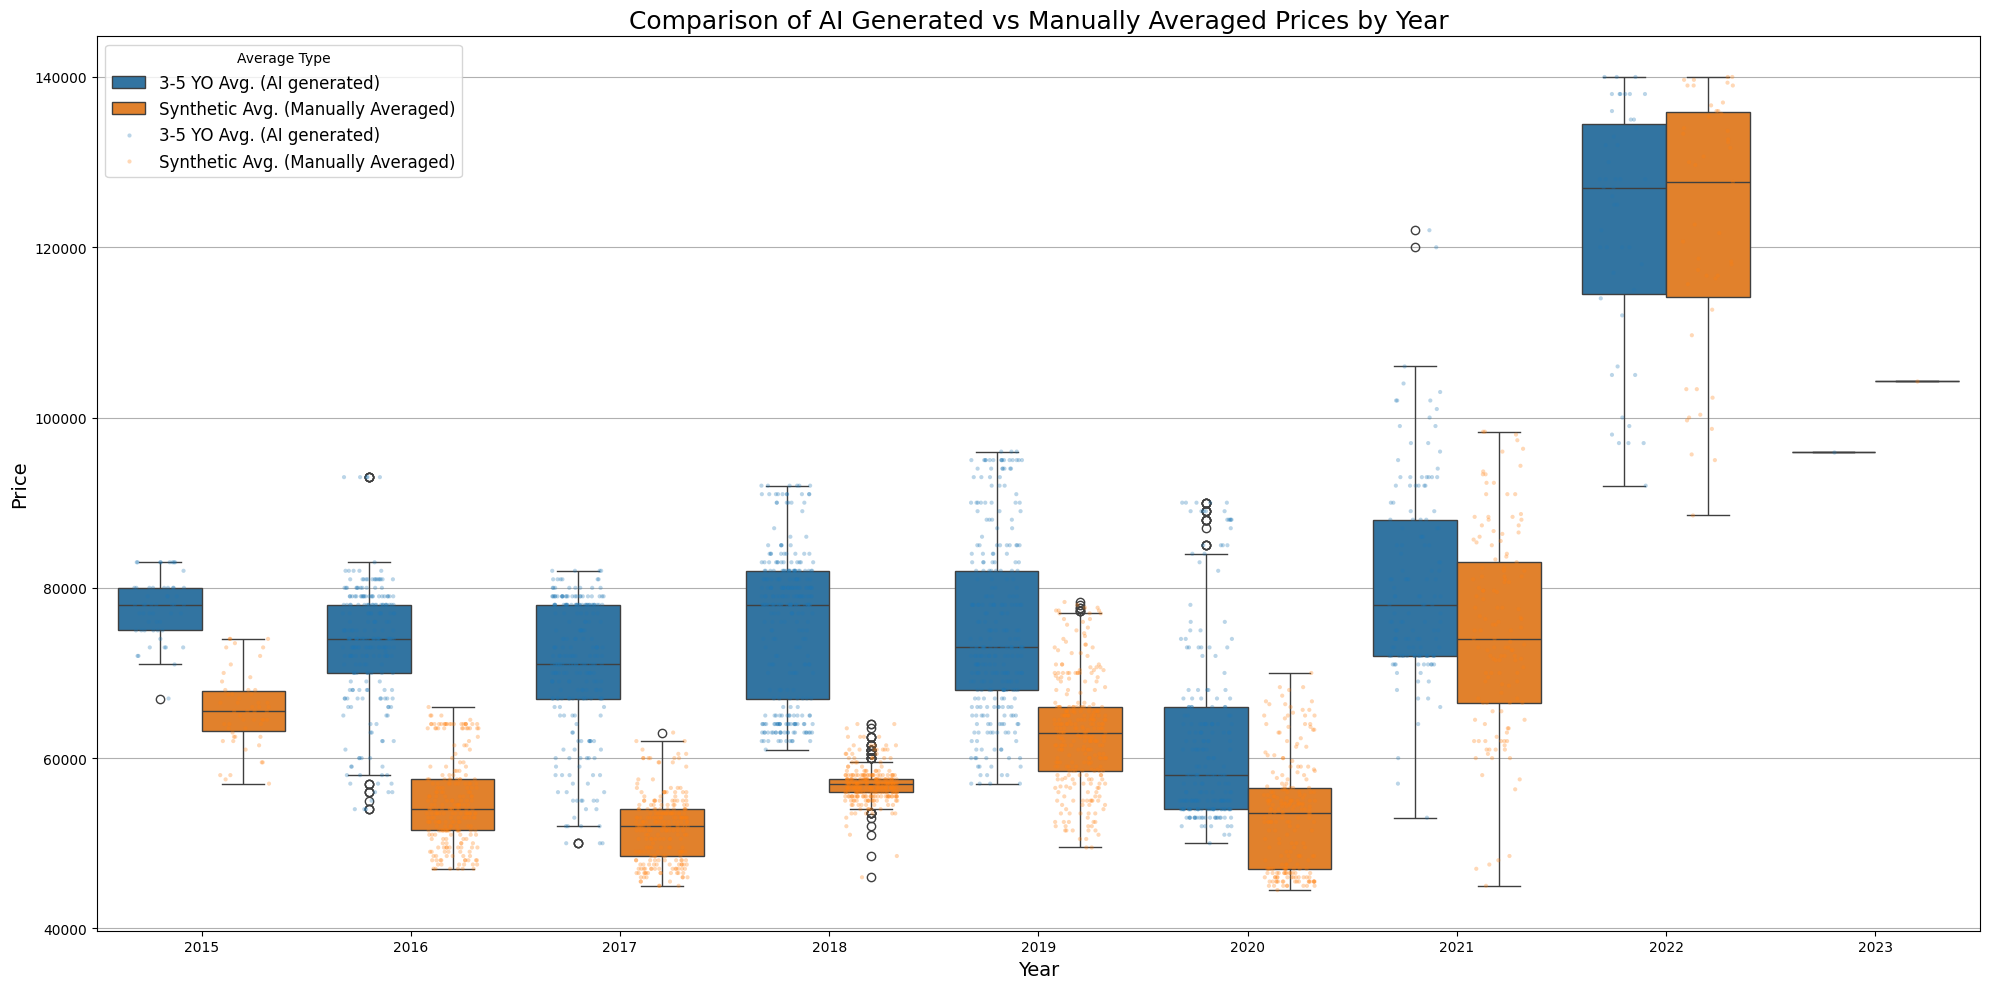

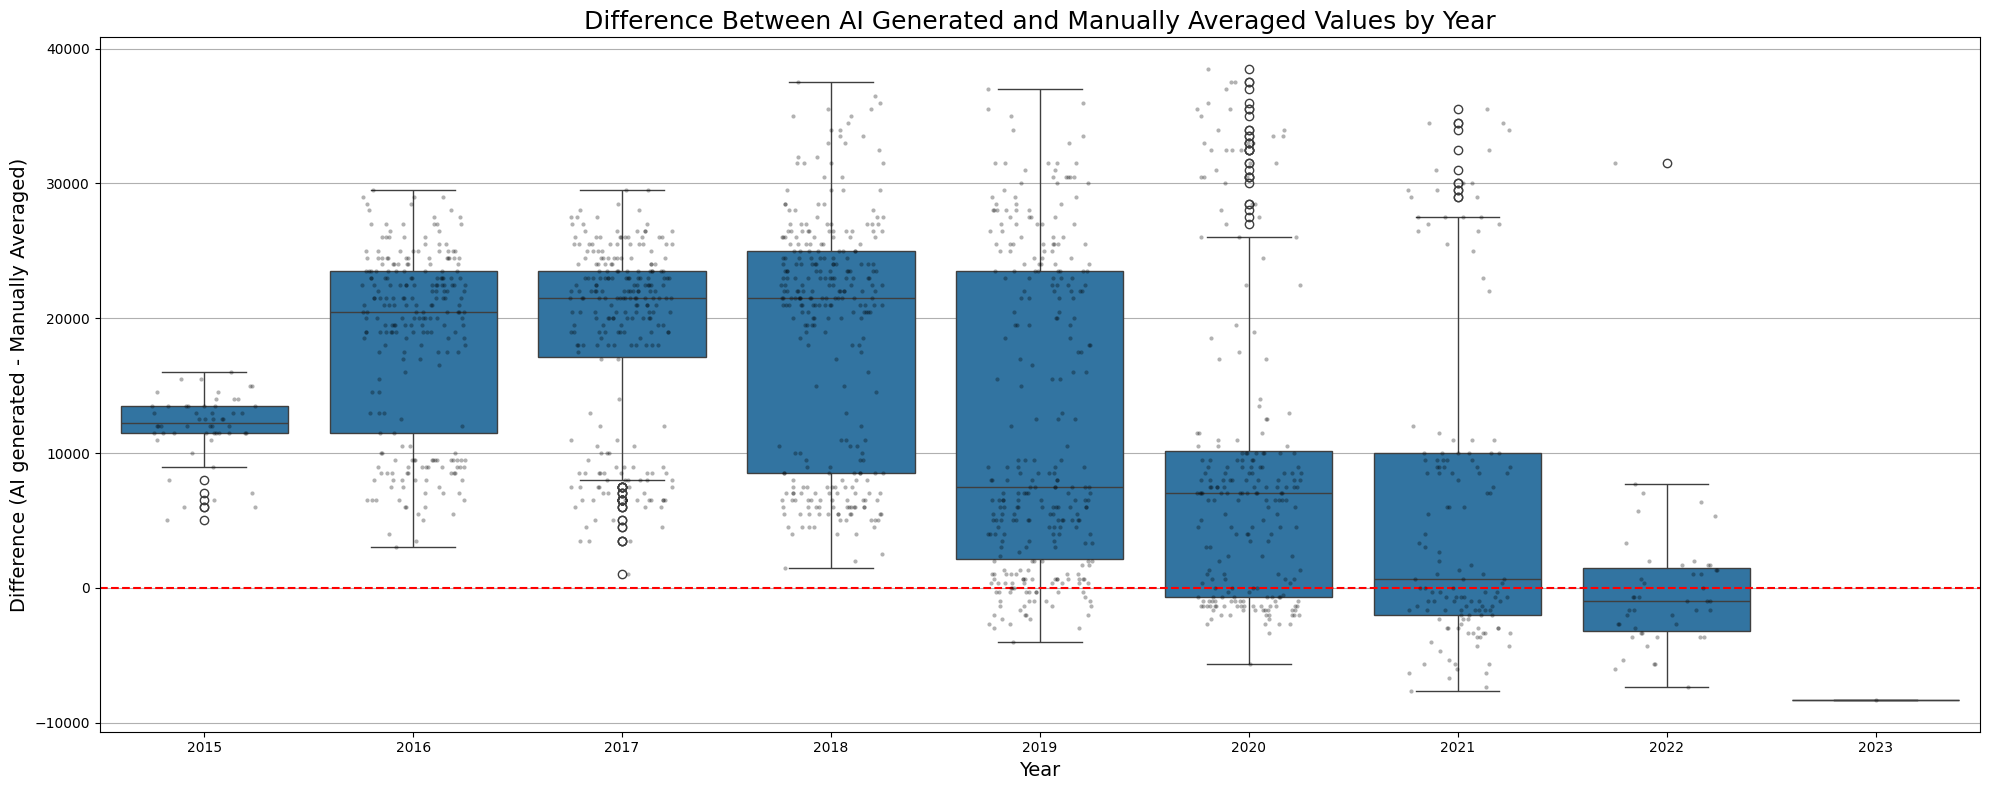

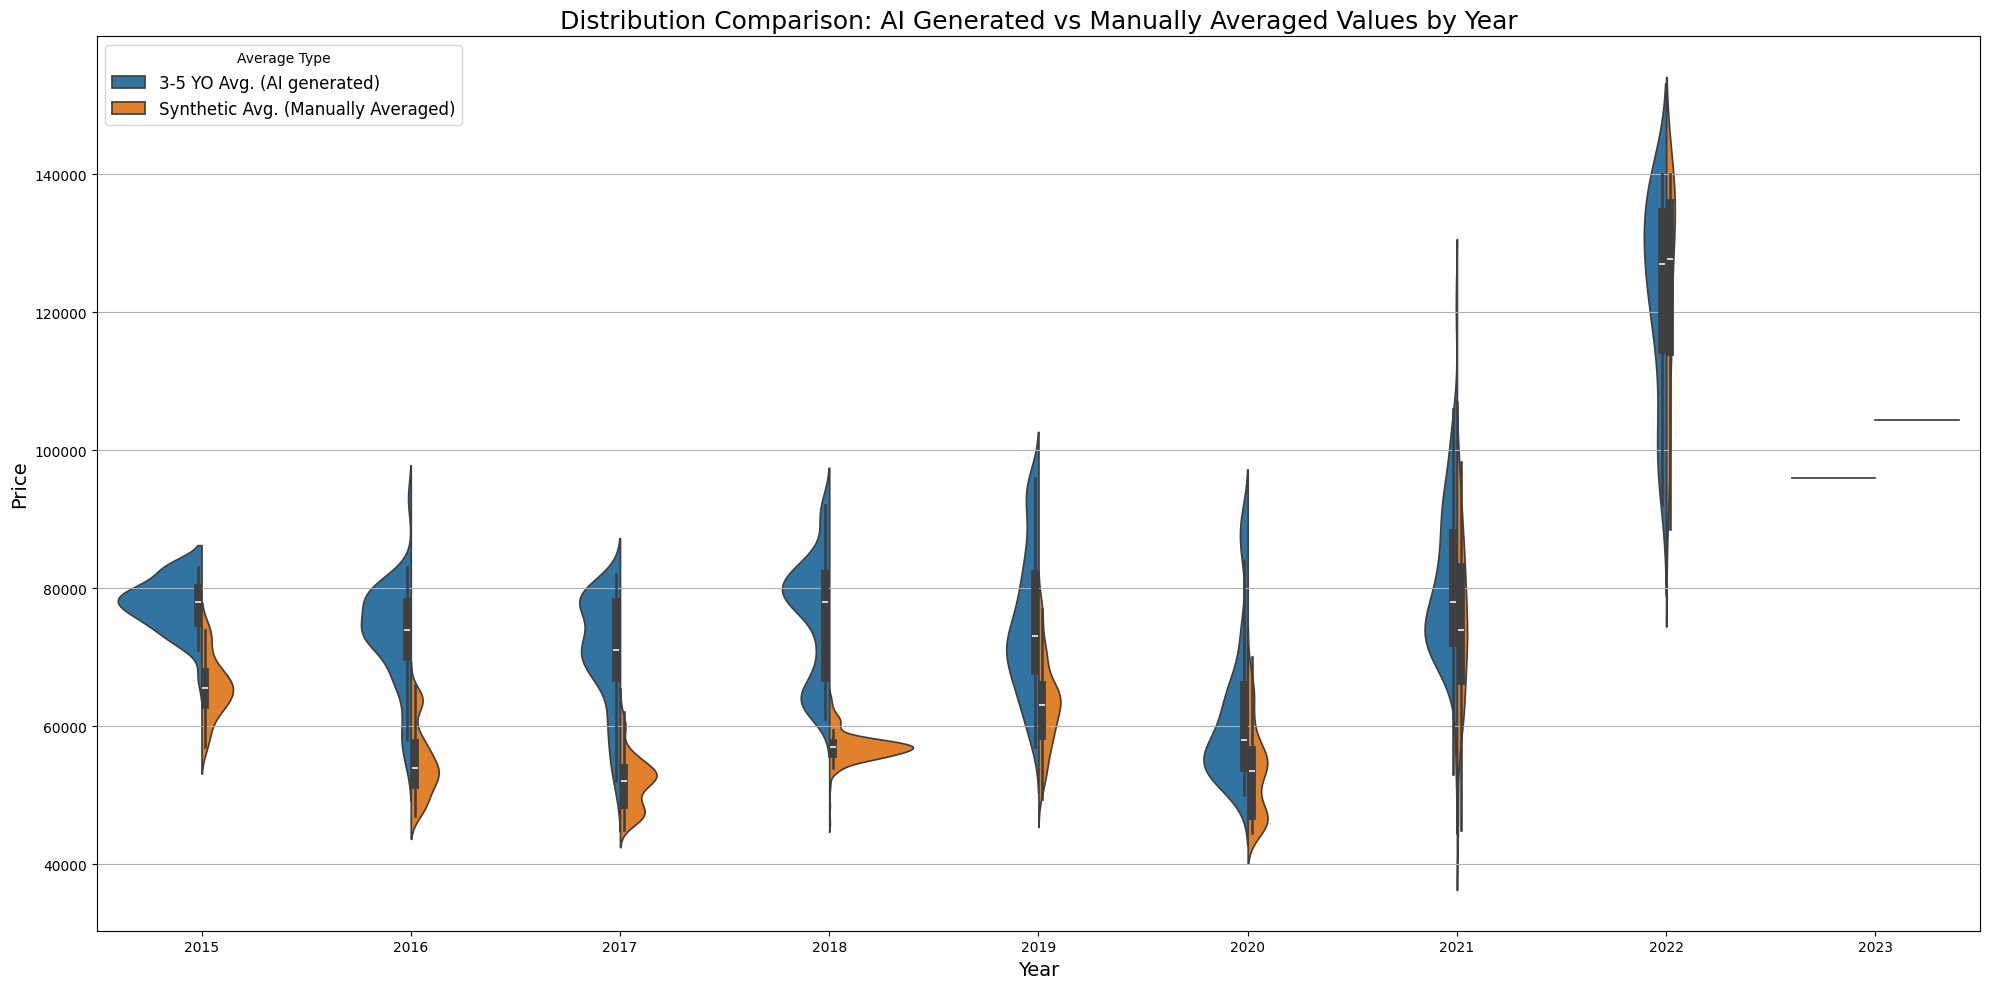

Statistical Summary of Differences by Year:


Difference                                        Abs_Difference  \
           mean    median       std      min       max           mean   
Year                                                                    
2015   12009.26  12250.00   2436.92  5000.00  16000.00       12009.26   
2016   18461.38  20500.00   6777.93  3000.00  29500.00       18461.38   
2017   18973.58  21500.00   6897.67  1000.00  29500.00       18973.58   
2018   18793.33  21500.00   8976.22  1500.00  37500.00       18793.33   
2019   12336.20   7500.00  11321.45 -4000.00  37000.00       12636.31   
2020    8924.11   7000.00  11230.28 -5666.67  38500.00        9723.21   
2021    6194.65    666.67  11666.69 -7666.67  35500.00        8671.53   
2022     -17.73  -1000.00   5833.25 -7333.33  31500.00        3485.82   
2023   -8333.33  -8333.33       NaN -8333.33  -8333.33        8333.33   

               Pct_Difference               3-5YO Avg.        
        median           mean median    std       mean count  
Year                                                          
2015  12250.00          18.49  19.07   4.25   77666.67    54  
2016  20500.00          34.22  39.01  13.22   73282.52   246  
2017  21500.00          36.83  41.46  13.62   70739.84   246  
2018  21500.00          33.23  38.05  16.09   75743.33   300  
2019   7500.00          20.57  13.04  18.93   75223.37   291  
2020   7000.00          17.88  14.32  21.85   62183.04   224  
2021   4666.67           9.92   0.87  18.00   81043.80   137  
2022   2000.00           0.24  -0.74   5.98  122531.91    47  
2023   8333.33          -7.99  -7.99    NaN   96000.00     1

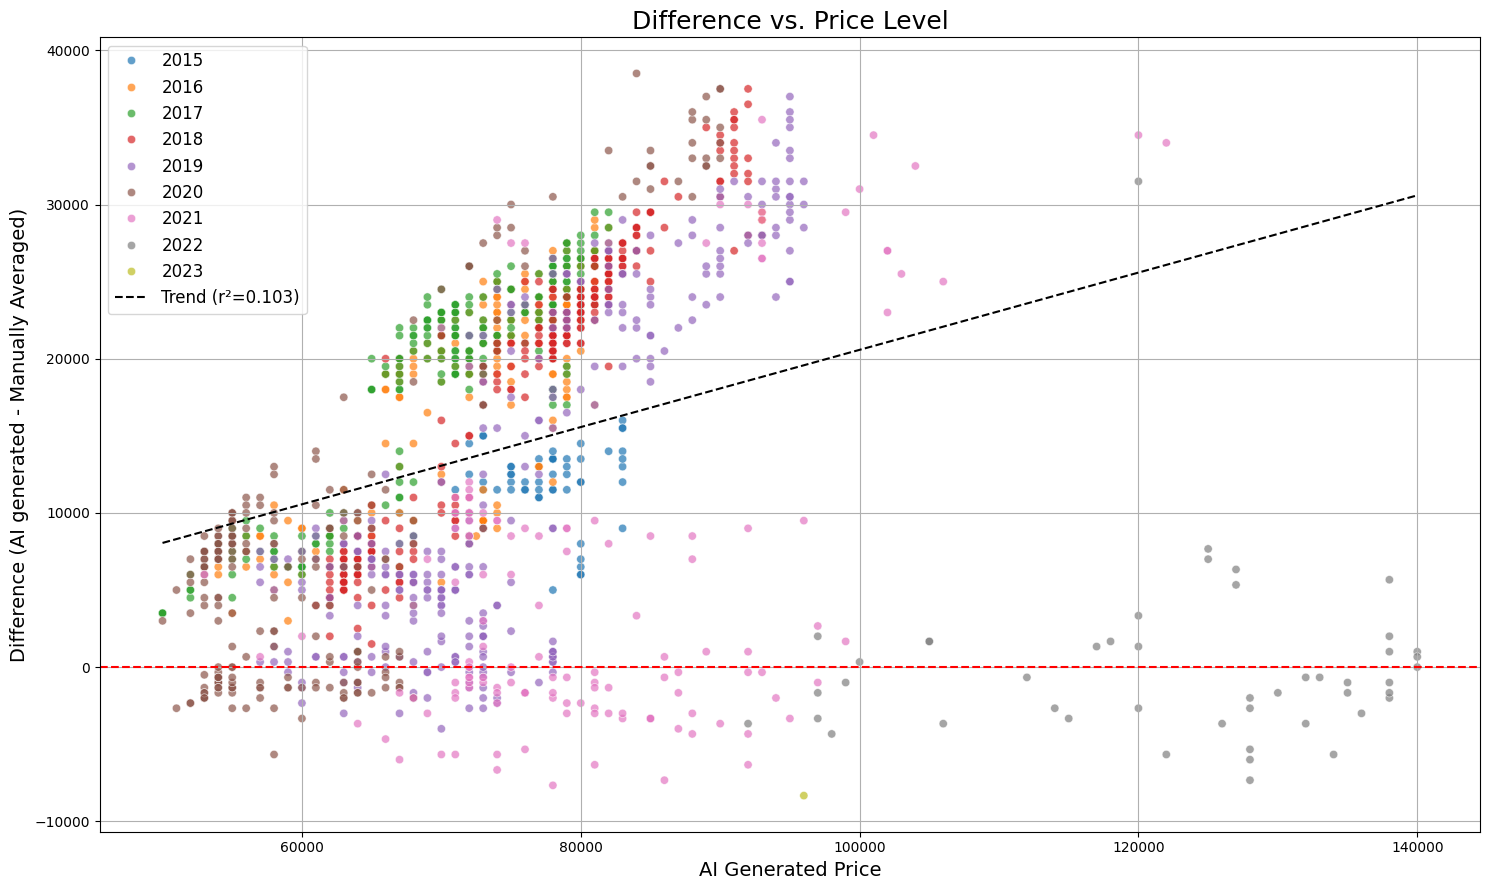

Yearly Comparison of Averages:


3-5 YO Avg. (AI generated)       Synthetic Avg. (Manually Averaged)  \
                           mean count                               mean   
Year                                                                       
2015                   77666.67    54                           65657.41   
2016                   73282.52   246                           55027.78   
2017                   70739.84   246                           51967.59   
2018                   75743.33   300                           57110.02   
2019                   75223.37   291                           64698.04   
2020                   62183.04   224                           54935.90   
2021                   81043.80   137                           76758.30   
2022                  122531.91    47                          124522.77   
2023                   96000.00     1                           90945.05   
2024                        NaN     0                           76474.36   

           Difference         
     count       mean      %  
Year                          
2015    54   12009.26  18.29  
2016   252   18254.74  33.17  
2017   252   18772.25  36.12  
2018   306   18633.31  32.63  
2019   409   10525.33  16.27  
2020   338    7247.14  13.19  
2021   251    4285.50   5.58  
2022   161   -1990.86  -1.60  
2023    91    5054.95   5.56  
2024    26        NaN    NaN

In [62]:
# Create boxplot time charts specifically comparing 3-5YO Avg. vs Synthetic Avg
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Ensure we have Year as a string column for better display
if 'Year' not in data.columns:
    data['Year'] = data['Date'].dt.year
data['Year'] = data['Year'].astype(str)

# Prepare data for comparison: selecting only the two columns we want to compare
comparison_data = data[['Year', 'Date', '3-5YO Avg.', 'Synthetic Avg']].copy().dropna()

# Create a new column with the renamed labels for better display
comparison_melted = comparison_data.melt(
    id_vars=['Year', 'Date'],
    value_vars=['3-5YO Avg.', 'Synthetic Avg'],
    var_name='Average Type',
    value_name='Price'
)

# Map the original column names to our new labels
comparison_melted['Average Type'] = comparison_melted['Average Type'].map({
    '3-5YO Avg.': '3-5 YO Avg. (AI generated)',
    'Synthetic Avg': 'Synthetic Avg. (Manually Averaged)'
})

# 1. Side-by-side boxplots by year
plt.figure(figsize=(20, 10))

# Create side-by-side boxplots for each year
sns.boxplot(x='Year', y='Price', hue='Average Type', data=comparison_melted)
plt.title('Comparison of AI Generated vs Manually Averaged Prices by Year', fontsize=18)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Price', fontsize=14)
plt.legend(title='Average Type', fontsize=12)
plt.grid(axis='y')
plt.xticks(rotation=0)

# Add points to show actual data distribution
sns.stripplot(x='Year', y='Price', hue='Average Type', data=comparison_melted, 
             dodge=True, alpha=0.3, size=3, jitter=0.25)
plt.legend(title='Average Type', loc='upper left', fontsize=12)

plt.tight_layout()
plt.show()

# 2. Calculate and visualize the differences
comparison_data['Difference'] = comparison_data['3-5YO Avg.'] - comparison_data['Synthetic Avg']
comparison_data['Abs_Difference'] = np.abs(comparison_data['Difference'])
comparison_data['Pct_Difference'] = (comparison_data['Difference'] / comparison_data['Synthetic Avg']) * 100

# Create boxplots of the differences by year
plt.figure(figsize=(20, 8))
sns.boxplot(x='Year', y='Difference', data=comparison_data)
plt.title('Difference Between AI Generated and Manually Averaged Values by Year', fontsize=18)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Difference (AI generated - Manually Averaged)', fontsize=14)
plt.grid(axis='y')
plt.axhline(y=0, color='r', linestyle='--')

# Add data points
sns.stripplot(x='Year', y='Difference', data=comparison_data, color='black', alpha=0.3, size=3, jitter=0.25)

plt.tight_layout()
plt.show()

# 3. Create violin plots for more detailed distribution comparison
plt.figure(figsize=(20, 10))
sns.violinplot(x='Year', y='Price', hue='Average Type', data=comparison_melted, split=True, inner='box')
plt.title('Distribution Comparison: AI Generated vs Manually Averaged Values by Year', fontsize=18)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Price', fontsize=14)
plt.legend(title='Average Type', fontsize=12)
plt.grid(axis='y')

plt.tight_layout()
plt.show()

# 4. Create a statistical summary of the differences
diff_summary = comparison_data.groupby('Year').agg({
    'Difference': ['mean', 'median', 'std', 'min', 'max'],
    'Abs_Difference': ['mean', 'median'],
    'Pct_Difference': ['mean', 'median', 'std'],
    '3-5YO Avg.': ['mean', 'count']
}).round(2)

print("Statistical Summary of Differences by Year:")
display(diff_summary)

# 5. Visualize how the difference varies by price level
plt.figure(figsize=(15, 9))
sns.scatterplot(x='3-5YO Avg.', y='Difference', hue='Year', data=comparison_data, alpha=0.7)
plt.title('Difference vs. Price Level', fontsize=18)
plt.xlabel('AI Generated Price', fontsize=14)
plt.ylabel('Difference (AI generated - Manually Averaged)', fontsize=14)
plt.grid(True)
plt.axhline(y=0, color='r', linestyle='--')

# Add a trend line
from scipy import stats
slope, intercept, r_value, p_value, std_err = stats.linregress(
    comparison_data['3-5YO Avg.'], comparison_data['Difference']
)
x_range = np.linspace(comparison_data['3-5YO Avg.'].min(), comparison_data['3-5YO Avg.'].max(), 100)
plt.plot(x_range, slope * x_range + intercept, 'k--', 
         label=f'Trend (r²={r_value**2:.3f})')
plt.legend(fontsize=12)

plt.tight_layout()
plt.show()

# 6. Create a summary table showing means of both averages by year and their differences
yearly_summary = data.groupby('Year').agg({
    '3-5YO Avg.': ['mean', 'count'],
    'Synthetic Avg': ['mean', 'count']
}).round(2)

# Add a column for the difference between means
yearly_summary[('Difference', 'mean')] = (
    yearly_summary[('3-5YO Avg.', 'mean')] - yearly_summary[('Synthetic Avg', 'mean')]
)

# Add a column for the percentage difference
yearly_summary[('Difference', '%')] = (
    yearly_summary[('Difference', 'mean')] / yearly_summary[('Synthetic Avg', 'mean')] * 100
)

# Rename the column headers for clarity
yearly_summary.columns = pd.MultiIndex.from_tuples([
    ('3-5 YO Avg. (AI generated)', 'mean'), 
    ('3-5 YO Avg. (AI generated)', 'count'),
    ('Synthetic Avg. (Manually Averaged)', 'mean'), 
    ('Synthetic Avg. (Manually Averaged)', 'count'),
    ('Difference', 'mean'),
    ('Difference', '%')
])

print("Yearly Comparison of Averages:")
display(yearly_summary.round(2))